<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/bdm/F4/F4_Assignment_4_Manual_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Cars Dataset
[Kaggle Link](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data)

[Geographical_file](https://developers.google.com/public-data/docs/canonical/states_csv) - Please download and save the csv file in the Google Drive prior run the code.

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. I built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

Project Team:

LEE SEOW MING THERESA (MCS231013)\
LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Upload the kaggle Token

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theresa2019","key":"2f0181430e31faee85be6f7b87c6600d"}'}

## Data Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from geopy.distance import geodesic

In [4]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                   LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1029         88  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            542         74  1.0              
thedrcat/daigt-proper-train-dataset                              DAIGT Proper Train Dataset                        119MB  2023-11-05 14:03:25           1099        114  1.0              
joebeachcapital/30000-spotify-songs                              

In [5]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 99% 260M/262M [00:09<00:00, 28.2MB/s]
100% 262M/262M [00:09<00:00, 27.5MB/s]


In [6]:
!unzip -u "/content/craigslist-carstrucks-data.zip"

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [7]:
df = pd.read_csv("/content/vehicles.csv")

In [8]:
pip install pandas scikit-learn geopy

# EDA

## Dataset overview

In [9]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [10]:
df.shape

(426880, 26)

In [11]:
df.head(5)

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [12]:
df.tail(3)

id                                                url  \
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders  ... size       type  \
426877          xt4 sport suv 4d      good          NaN  ...  NaN  hatchback   
426878           es 350 sedan 4d      good  6 cylinders  ...  NaN      sedan   
426879  4 series 430i gran coupe      good          NaN  ...  NaN      coupe   

       paint_color                                          image_url  \
426877       white  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878      silver  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879         NaN  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description county state  \
426877  Carvana is the safer way to buy a car During t...    NaN    wy   
426878  Carvana is the safer way to buy a car During t...    NaN    wy   
426879  Carvana is the safer way to buy a car During t...    NaN    wy   

              lat       long              posting_date  
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600  

[3 rows x 26 columns]

In [13]:
df.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

In [14]:
df.describe(include='object')

url    region  \
count                                              426880    426880   
unique                                             426880       404   
top     https://prescott.craigslist.org/cto/d/prescott...  columbus   
freq                                                    1      3608   

                            region_url manufacturer   model condition  \
count                           426880       409234  421603    252776   
unique                             413           42   29667         6   
top     https://spokane.craigslist.org         ford   f-150      good   
freq                              2988        70985    8009    121456   

          cylinders    fuel title_status transmission                VIN  \
count        249202  423867       418638       424324             265838   
unique            8       5            6            3             118264   
top     6 cylinders     gas        clean    automatic  1FMJU1JT1HEA52352   
freq          94169  356209       405117       336524                261   

         drive       size    type paint_color  \
count   296313     120519  334022      296677   
unique       3          4      13          12   
top        4wd  full-size   sedan       white   
freq    131904      63465   87056       79285   

                                                image_url  \
count                                              426812   
unique                                             241899   
top     https://images.craigslist.org/00N0N_1xMPvfxRAI...   
freq                                                 7357   

                                              description   state  \
count                                              426810  426880   
unique                                             360911      51   
top     35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! T...      ca   
freq                                                  231   50614   

                    posting_date  
count                     426812  
unique                    381536  
top     2021-04-23T22:13:05-0400  
freq                          12

In [15]:
# To observe unique variable for conditioner variables

print(df['cylinders'].unique())
print(df['size'].unique())
print(df['condition'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['drive'].unique())
print(df['type'].unique())
print(df['paint_color'].unique())

[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'other' 'automatic' 'manual']
[nan 'rwd' '4wd' 'fwd']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']


## Data Type

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [17]:
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [18]:
df[['cylinders','unit']] = df['cylinders'].str.split(" ",expand = True)

# Drop unit variable
df.drop(['unit'],inplace=True,axis=1)
df['cylinders'].unique()

array([nan, '8', '6', '4', '5', 'other', '3', '10', '12'], dtype=object)

In [19]:
df['cylinders'].replace(to_replace=['other'],value=[np.nan],inplace=True)
df['cylinders'].unique()

array([nan, '8', '6', '4', '5', '3', '10', '12'], dtype=object)

In [20]:
df['id']=df['id'].astype(object)
df['cylinders']=df['cylinders'].astype(float)

In [21]:
df['posting_date']= pd.to_datetime(df['posting_date'])

In [22]:
df['year']= pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  object 
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     247904 non-null  float64
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Missing Value

In [24]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [25]:
## Drop Empty County Column.
df.drop(['county'],inplace=True,axis=1)

In [26]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [27]:
# Fill OBJECT empty cell with "Not Provided"
#df['manufacturer'].fillna("Not Provided",inplace=True)
#df['model'].fillna("Not Provided",inplace=True)
#df['condition'].fillna("Not Provided",inplace=True)
#df['fuel'].fillna("Not Provided",inplace=True)
#df['drive'].fillna("Not Provided",inplace=True)
#df['title_status'].fillna("Not Provided",inplace=True)
#df['transmission'].fillna("Not Provided",inplace=True)
#df['VIN'].fillna("Not Provided",inplace=True), need to drop
#df['size'].fillna("Not Provided",inplace=True)
#df['type'].fillna("Not Provided",inplace=True)
#df['paint_color'].fillna("Not Provided",inplace=True)
#df['image_url'].fillna("Not Provided",inplace=True), need to drop
#df['description'].fillna("Not Available",inplace=True), need to drop

# No action will be do on numerical variable

In [28]:
df['posting_date'].fillna(method="ffill",inplace=True)
df['posting_date'].fillna(method="bfill",inplace=True)
df['year'].fillna(method="ffill",inplace=True)
df['year'].fillna(method="bfill",inplace=True)

In [29]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
state                0
lat               6549
long              6549
posting_date         0
dtype: int64

## Duplicate Value

In [30]:
df.duplicated().sum()

0

In [31]:
df.drop_duplicates()

id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://prescott.craigslist.org   6000   
1                 fayetteville       https://fayar.craigslist.org  11900   
2                 florida keys        https://keys.craigslist.org  21000   
3       worcester / central MA   https://worcester.craigslist.org   1500   
4                   greensboro  https://greensboro.craigslist.org   4900   
...                        ...                                ...    ...   
426875                 wyoming     https://wyoming.craigslist.org  23590   
426876                 wyoming     https://wyoming.craigslist.org  30590   
426877                 wyoming     https://wyoming.craigslist.org  34990   
426878                 wyoming     https://wyoming.craigslist.org  28990   
426879                 wyoming     https://wyoming.craigslist.org  30590   

          year manufacturer                     model condition  cylinders  \
0       2014.0          NaN                       NaN       NaN        NaN   
1       2014.0          NaN                       NaN       NaN        NaN   
2       2014.0          NaN                       NaN       NaN        NaN   
3       2014.0          NaN                       NaN       NaN        NaN   
4       2014.0          NaN                       NaN       NaN        NaN   
...        ...          ...                       ...       ...        ...   
426875  2019.0       nissan         maxima s sedan 4d      good        6.0   
426876  2020.0        volvo  s60 t5 momentum sedan 4d      good        NaN   
426877  2020.0     cadillac          xt4 sport suv 4d      good        NaN   
426878  2018.0        lexus           es 350 sedan 4d      good        6.0   
426879  2019.0          bmw  4 series 430i gran coupe      good        NaN   

        ... drive  size       type paint_color  \
0       ...   NaN   NaN        NaN         NaN   
1       ...   NaN   NaN        NaN         NaN   
2       ...   NaN   NaN        NaN         NaN   
3       ...   NaN   NaN        NaN         NaN   
4       ...   NaN   NaN        NaN         NaN   
...     ...   ...   ...        ...         ...   
426875  ...   fwd   NaN      sedan         NaN   
426876  ...   fwd   NaN      sedan         red   
426877  ...   NaN   NaN  hatchback       white   
426878  ...   fwd   NaN      sedan      silver   
426879  ...   rwd   NaN      coupe         NaN   

                                                image_url  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
426875  https://images.craigslist.org/00o0o_iiraFnHg8q...   
426876  https://images.craigslist.org/00x0x_15sbgnxCIS...   
426877  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879  https://i

In [32]:
df.duplicated().all()

False

## Univariable Analysis

1. 'id'
2. 'url' --> drop
3. 'region'
4. 'region_url' --> drop
5. 'price'
6. 'year'
7. 'manufacturer'
8. 'model'
9. 'condition'
10. 'cylinders'
11. 'fuel'
12. 'odometer'
13. 'title_status'
14. 'transmission'
15. 'VIN' --> drop
16. 'drive'
17. 'size'
18. 'type'
19. 'paint_color'
20. 'image_url' --> drop
21. 'description' --> drop
22. 'state'
23. 'lat', 'long' --> not sure
24. 'posting_date'


### 1. id

In [33]:
df['id'].describe()

count         426880
unique        426880
top       7222695916
freq               1
Name: id, dtype: int64

In [34]:
id_uniqueness = (df.id.count()/df.id.nunique()*100)
id_uniqueness

100.0

In [35]:
id_count = df['id'].value_counts().rename_axis('url').reset_index(name='count')
id_count

url  count
0       7222695916      1
1       7313139418      1
2       7313423023      1
3       7313423324      1
4       7313424533      1
...            ...    ...
426875  7314655506      1
426876  7314655833      1
426877  7314657468      1
426878  7314659947      1
426879  7301591129      1

[426880 rows x 2 columns]

100% of uniqueness = No duplication on id where proved it is suitable fit as key variable.

### 2. url [ Dropped ]

In [36]:
df['url'].describe()

count                                                426880
unique                                               426880
top       https://prescott.craigslist.org/cto/d/prescott...
freq                                                      1
Name: url, dtype: object

In [37]:
url_uniqueness = (df.url.count()/df.url.nunique()*100)
url_uniqueness

100.0

In [38]:
url_count = df['url'].value_counts().rename_axis('url').reset_index(name='count')
url_count

url  count
0       https://prescott.craigslist.org/cto/d/prescott...      1
1       https://nh.craigslist.org/cto/d/troy-1998-dodg...      1
2       https://nh.craigslist.org/ctd/d/north-hampton-...      1
3       https://nh.craigslist.org/ctd/d/derry-2008-chr...      1
4       https://nh.craigslist.org/ctd/d/derry-2002-toy...      1
...                                                   ...    ...
426875  https://chicago.craigslist.org/chc/cto/d/pleas...      1
426876  https://chicago.craigslist.org/wcl/cto/d/saint...      1
426877  https://chicago.craigslist.org/nwc/cto/d/north...      1
426878  https://chicago.craigslist.org/sox/cto/d/chica...      1
426879  https://wyoming.craigslist.org/ctd/d/atlanta-2...      1

[426880 rows x 2 columns]

As shown above each id having unique url link.

Url link is dropped due to duplication with id.

In [39]:
df.drop(['url'],inplace=True,axis=1)

### 3. region

In [40]:
df['region'].describe()

count       426880
unique         404
top       columbus
freq          3608
Name: region, dtype: object

In [41]:
region_count=df['region'].value_counts().rename_axis('region').reset_index(name='count')
region_count

region  count
0                   columbus   3608
1               jacksonville   3562
2    spokane / coeur d'alene   2988
3                     eugene   2985
4            fresno / madera   2983
..                       ...    ...
399                 meridian     28
400             southwest MS     14
401              kansas city     11
402           fort smith, AR      9
403      west virginia (old)      8

[404 rows x 2 columns]

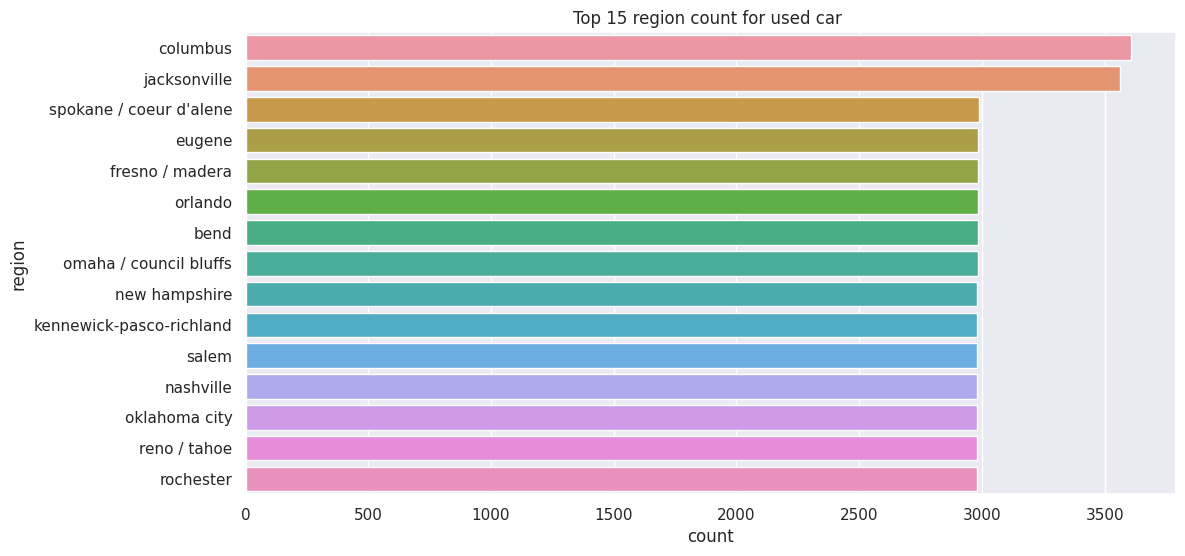

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region',data=region_count.nlargest(15, 'count')).set(title='Top 15 region count for used car ')
plt.show()

### 4. region url [Dropped]

In [43]:
df['region_url'].describe()

count                             426880
unique                               413
top       https://spokane.craigslist.org
freq                                2988
Name: region_url, dtype: object

In [44]:
ru_count=pd.DataFrame(df.groupby('region_url',as_index=False)['region'].value_counts().sort_values(ascending=False,by='count'))
ru_count

region_url                   region  count
348     https://spokane.craigslist.org  spokane / coeur d'alene   2988
107      https://eugene.craigslist.org                   eugene   2985
271     https://orlando.craigslist.org                  orlando   2983
126      https://fresno.craigslist.org          fresno / madera   2983
266       https://omaha.craigslist.org   omaha / council bluffs   2982
..                                 ...                      ...    ...
223    https://meridian.craigslist.org                 meridian     28
243     https://natchez.craigslist.org             southwest MS     14
173  https://kansascity.craigslist.org              kansas city     11
122   https://fortsmith.craigslist.org           fort smith, AR      9
408          https://wv.craigslist.org      west virginia (old)      8

[416 rows x 3 columns]

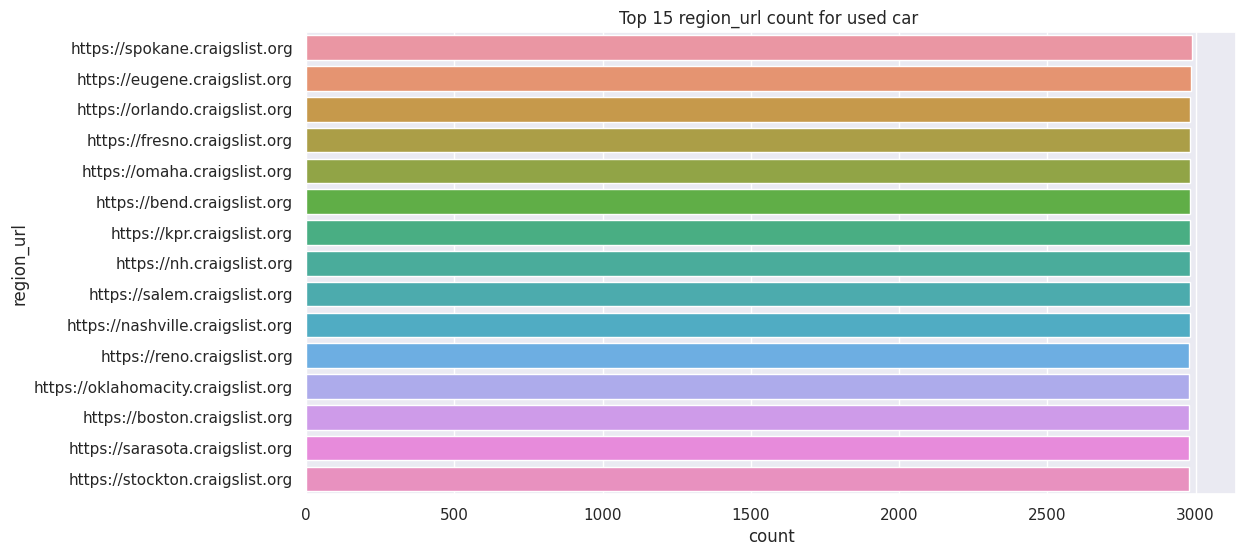

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region_url',data=ru_count.nlargest(15, 'count')).set(title='Top 15 region_url count for used car ')
plt.show()

The region url is similar to region where the url can be replace by region and meaningless. Hence, region url can be dropped.

In [46]:
df.drop(['region_url'],inplace=True,axis=1)

### 5. price

In [47]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [48]:
df['price'].min()

0

In [49]:
df['price'].max()

3736928711

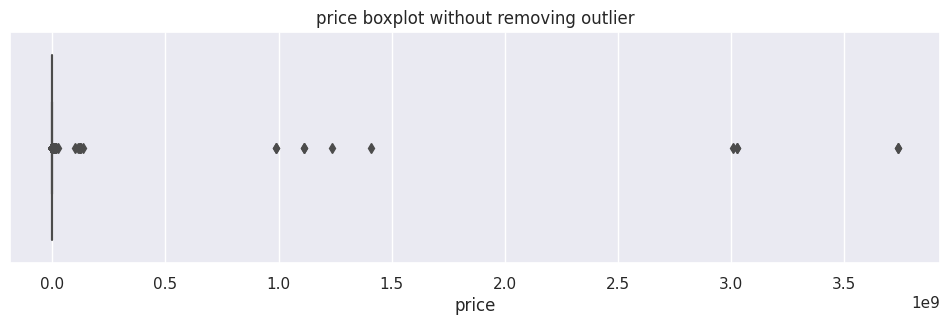

In [50]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df).set(title ='price boxplot without removing outlier')
plt.show()

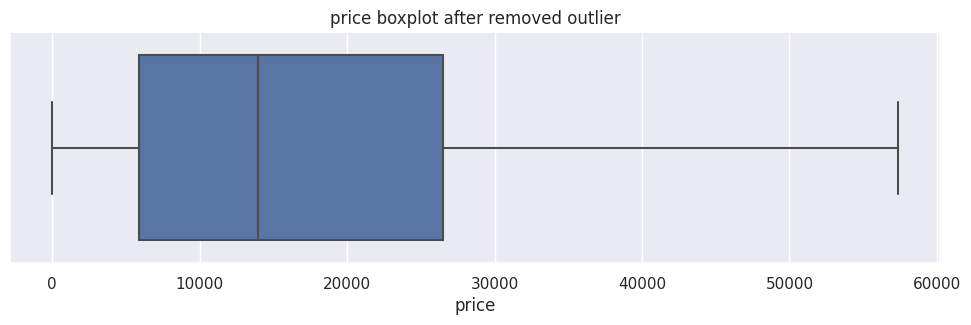

In [51]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df,showfliers=False).set(title ='price boxplot after removed outlier')
plt.show()
plt.show()

In [52]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

price  count
0          0  32895
1       6995   3169
2       7995   3129
3       9995   2867
4       8995   2837
...      ...    ...
15650  21298      1
15651  49217      1
15652  63195      1
15653  19709      1
15654  17873      1

[15655 rows x 2 columns]

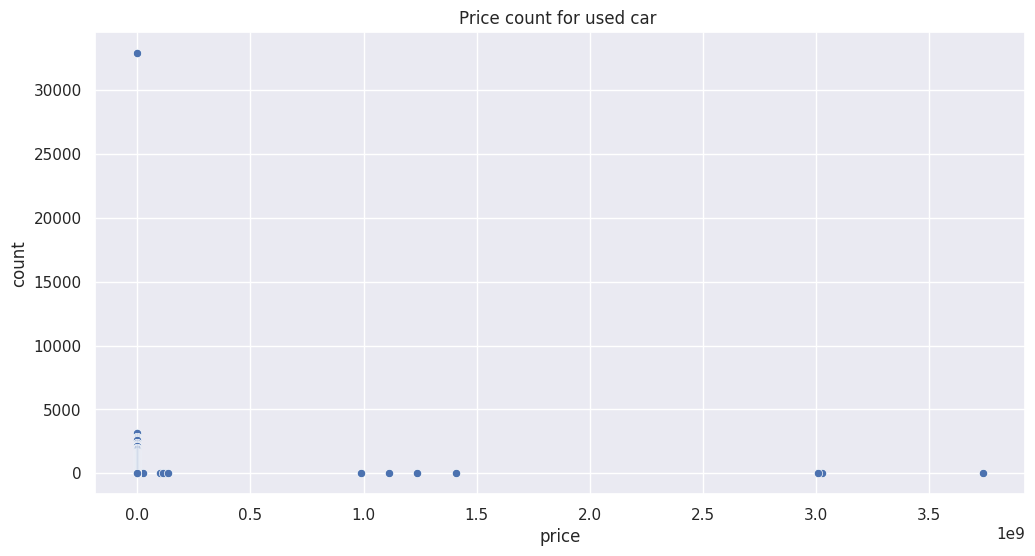

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

Based on finding on the price range, some outliers on price was observed.
Some preprocessing of price need to be done to remove outlier.

In [54]:
#q_low
ypbot = np.percentile(df.price, 1)
#q_high
yptop = np.percentile(df.price, 99)
ypad = 0.2*(yptop - ypbot)
ymin = ypbot - ypad
ymax = yptop + ypad

#ymin will be set as 0 due to price is a ratio value which minimum is 0 .
(0,ymax)

# df_filtered
df = df[(df["price"] < ymax) & (df["price"] > 0)]

#Another method
# Q1 = df["price"].quantile(0.25)
# Q3  = df["price"].quantile(0.75)
# IQR= Q3-Q1
# q_low=Q1-1.5*IQR
# q_high=Q3+1.5*IQR

# (q_low,q_high)

# # df_filtered
# # df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

In [55]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

price  count
0       6995   3169
1       7995   3129
2       9995   2867
3       8995   2837
4       4500   2778
...      ...    ...
15228   9301      1
15229  23397      1
15230  35693      1
15231  48300      1
15232  17873      1

[15233 rows x 2 columns]

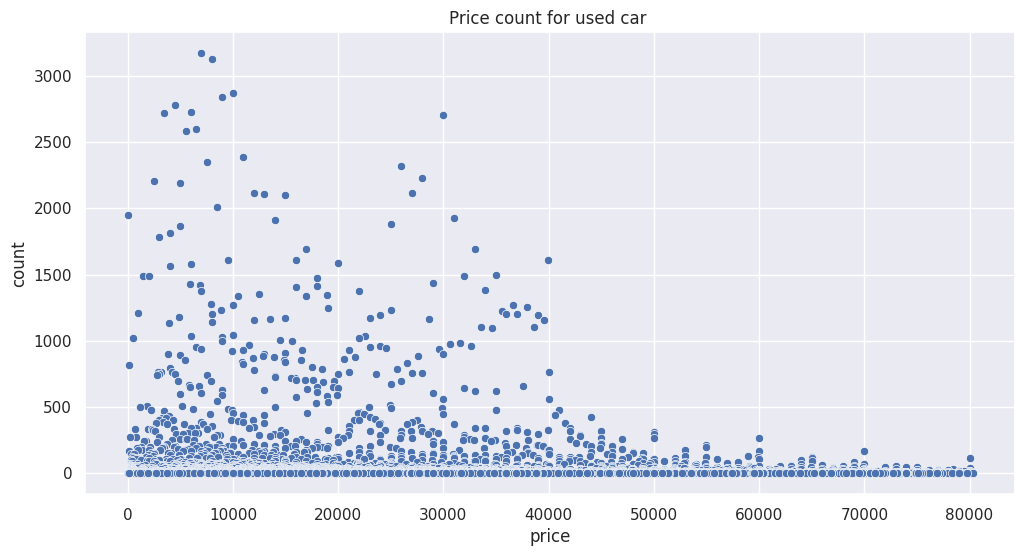

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

### 6. year

In [57]:
df['year'].describe()

count    392359.000000
mean       2011.003023
std           9.591335
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [58]:
df['year'].min()

1900.0

In [59]:
df['year'].max()

2022.0

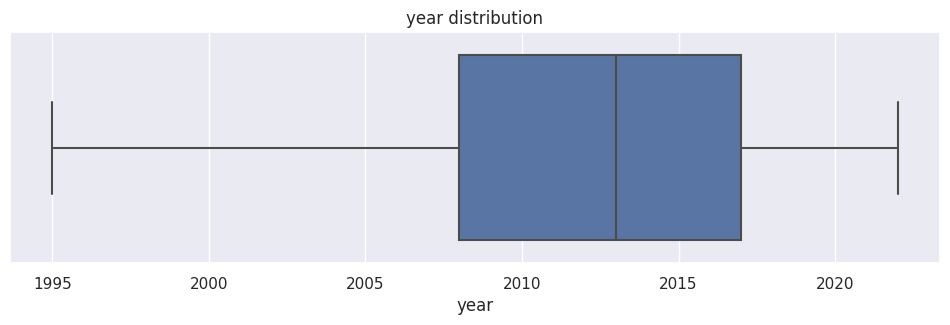

In [60]:
plt.figure(figsize=(12,3))
sns.boxplot(x='year',data=df,showfliers=False).set(title='year distribution')
plt.show()

In [61]:
year_count=df['year'].value_counts().rename_axis('year').reset_index(name='count')
year_count

year  count
0    2018.0  32562
1    2017.0  32560
2    2013.0  28233
3    2015.0  28041
4    2016.0  27421
..      ...    ...
107  1905.0      1
108  1943.0      1
109  1913.0      1
110  1918.0      1
111  1909.0      1

[112 rows x 2 columns]

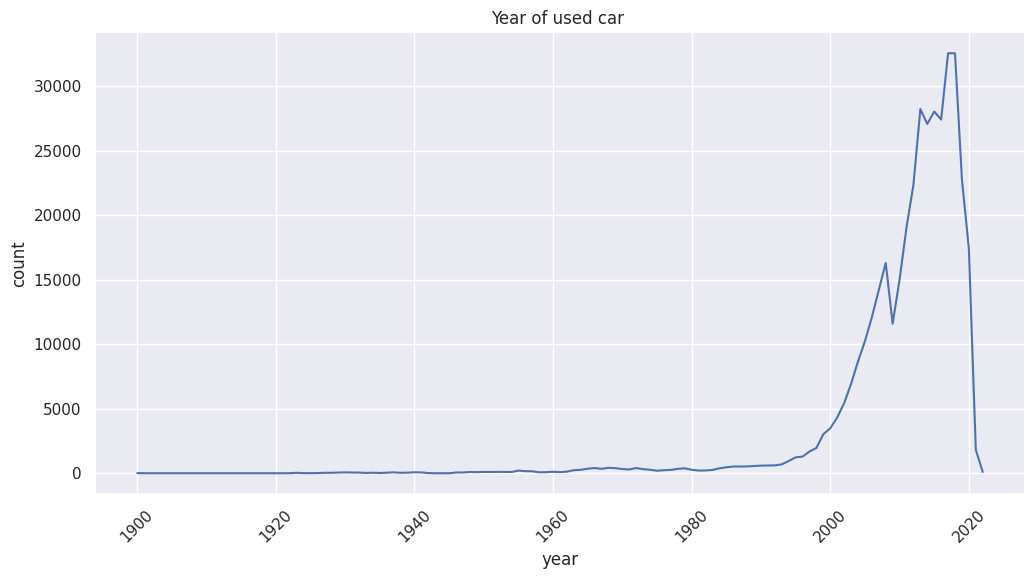

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count',data=year_count).set(title='Year of used car ')
plt.xticks(rotation=45)
plt.show()

### 7. manufacturer

In [63]:
df['manufacturer'].describe()

count     376495
unique        42
top         ford
freq       64607
Name: manufacturer, dtype: object

In [64]:
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun',
       'aston-martin', 'land rover', 'ferrari', 'morgan'], dtype=object)

In [65]:
manu_count=df['manufacturer'].value_counts().rename_axis('manufacturer').reset_index(name='count')
manu_count

manufacturer  count
0              ford  64607
1         chevrolet  50372
2            toyota  31591
3             honda  19866
4              jeep  17430
5            nissan  17382
6               ram  16419
7               gmc  15306
8               bmw  13710
9             dodge  12283
10    mercedes-benz  10332
11          hyundai   9374
12           subaru   8984
13       volkswagen   8896
14            lexus   7727
15              kia   7547
16             audi   7141
17         cadillac   6563
18            acura   5700
19         chrysler   5652
20            buick   5178
21            mazda   5048
22         infiniti   4471
23          lincoln   4029
24            volvo   3276
25       mitsubishi   3109
26             mini   2260
27          pontiac   2227
28            rover   1942
29           jaguar   1898
30          porsche   1247
31          mercury   1136
32           saturn   1071
33       alfa-romeo    870
34            tesla    836
35             fiat    772
36  harley-davidson    138
37           datsun     63
38     aston-martin     17
39       land rover     11
40          ferrari     11
41           morgan      3

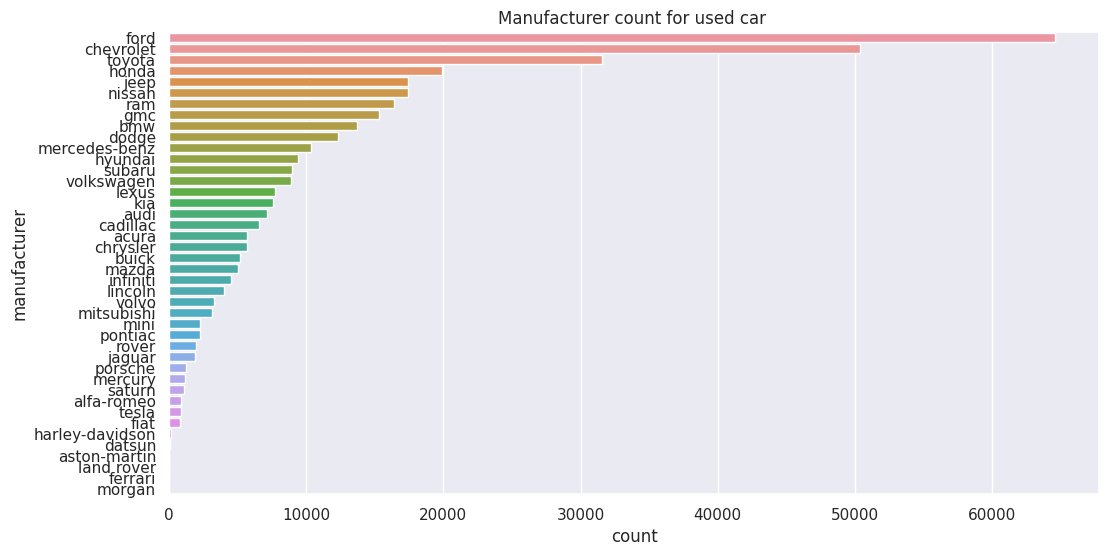

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='manufacturer',data=manu_count.query('manufacturer!="Not Provided"')).set(title='Manufacturer count for used car ')
plt.show()

### 8. model

In [67]:
df['model'].describe()

count     387845
unique     28009
top        f-150
freq        7112
Name: model, dtype: object

In [68]:
model_count=df['model'].value_counts().rename_axis('model').reset_index(name='count')
model_count

model  count
0                        f-150   7112
1               silverado 1500   4546
2                         1500   3796
3                        camry   2827
4                    silverado   2776
...                        ...    ...
28004                  ln 8000      1
28005              // vmi // ♿      1
28006     mustang fastback 2+2      1
28007                Tiger mag      1
28008  Paige Glenbrook Touring      1

[28009 rows x 2 columns]

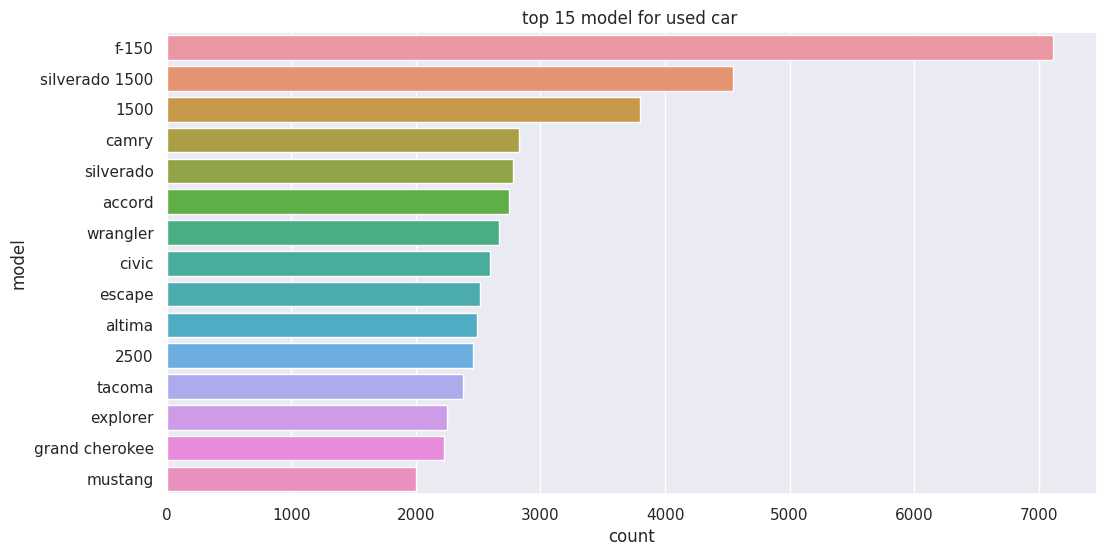

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='model',data=model_count.query('model!="Not Provided"').nlargest(15,'count')).set(title='top 15 model for used car ')
plt.show()

### 9. condition

In [70]:
df['condition'].describe()

count     241991
unique         6
top         good
freq      119083
Name: condition, dtype: object

In [71]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [72]:
con_count=df['condition'].value_counts().rename_axis('condition').reset_index(name='count')
con_count

condition   count
0       good  119083
1  excellent   94621
2   like new   19892
3       fair    6718
4        new    1082
5    salvage     595

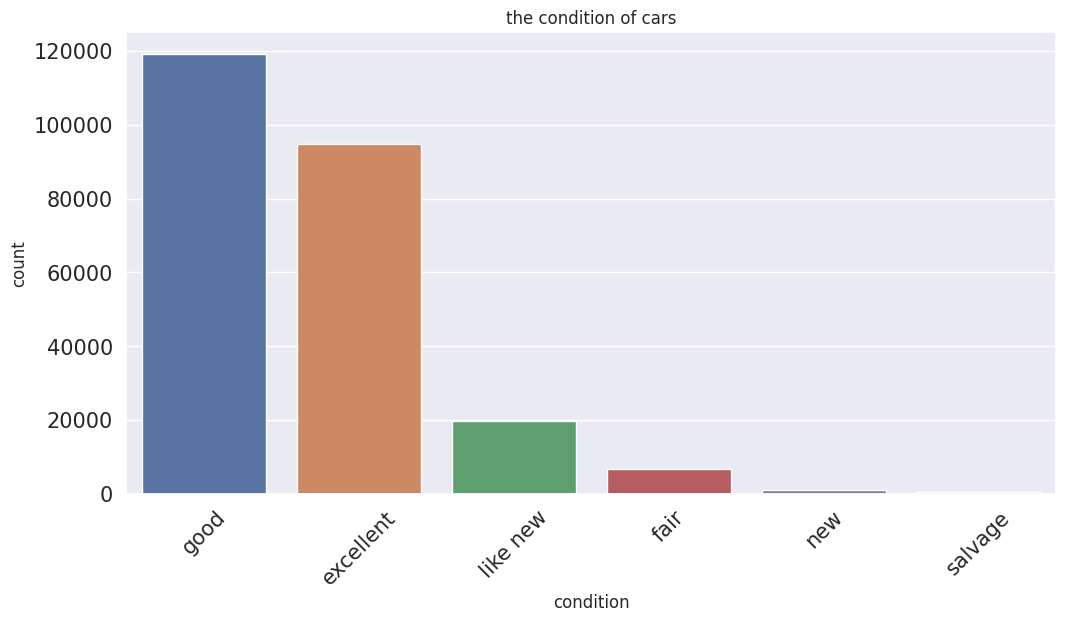

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x='condition',y='count',data=con_count.query('condition!="Not Provided"')).set(title='the condition of cars')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);

### 10. cylinders

In [74]:
df['cylinders'].describe()

count    231549.000000
mean          5.952481
std           1.596516
min           3.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: cylinders, dtype: float64

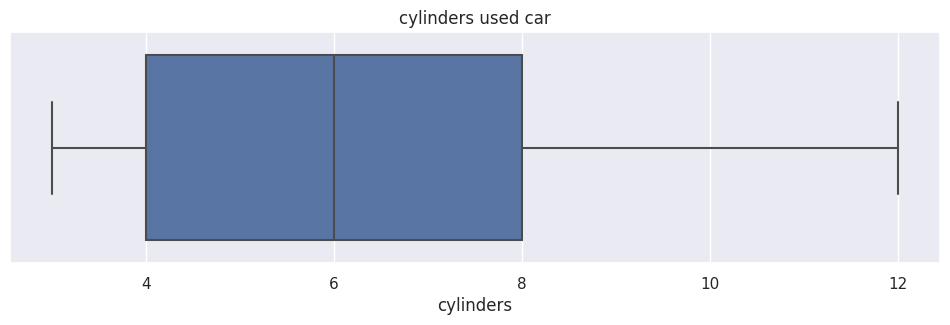

In [75]:
plt.figure(figsize=(12,3))
sns.boxplot(x='cylinders',data=df).set(title='cylinders used car')
plt.show()

In [76]:
cyc_count=df['cylinders'].value_counts().rename_axis('cylinders').reset_index(name='count')
cyc_count

cylinders  count
0        6.0  88719
1        4.0  72985
2        8.0  66063
3        5.0   1668
4       10.0   1338
5        3.0    611
6       12.0    165

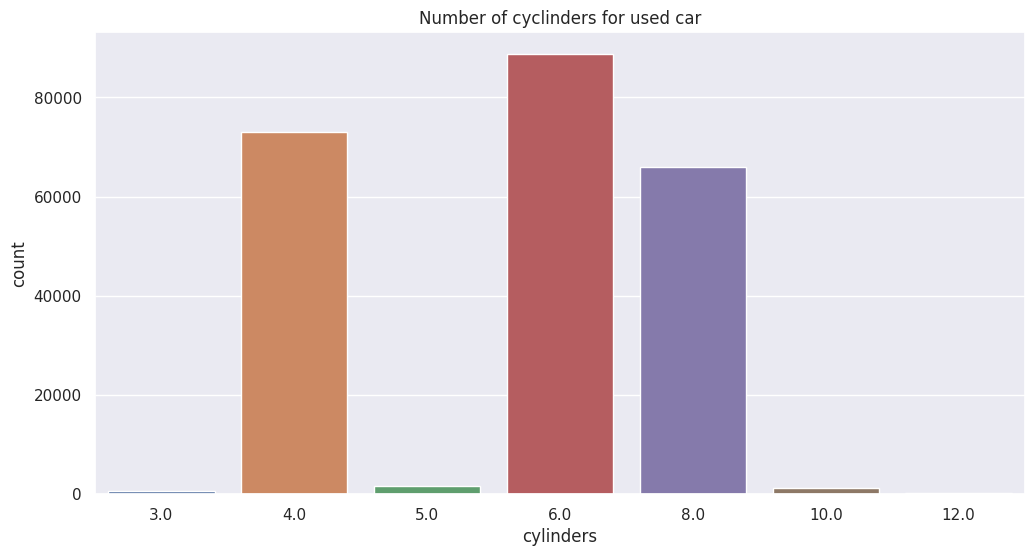

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(x='cylinders',y='count',data=cyc_count).set(title='Number of cyclinders for used car')
plt.show()

### 11. fuel

In [78]:
df['fuel'].describe()

count     389771
unique         5
top          gas
freq      329490
Name: fuel, dtype: object

In [79]:
df['fuel'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [80]:
fuel_count=df['fuel'].value_counts().rename_axis('fuel').reset_index(name='count')
fuel_count

fuel   count
0       gas  329490
1     other   27879
2    diesel   25905
3    hybrid    4884
4  electric    1613

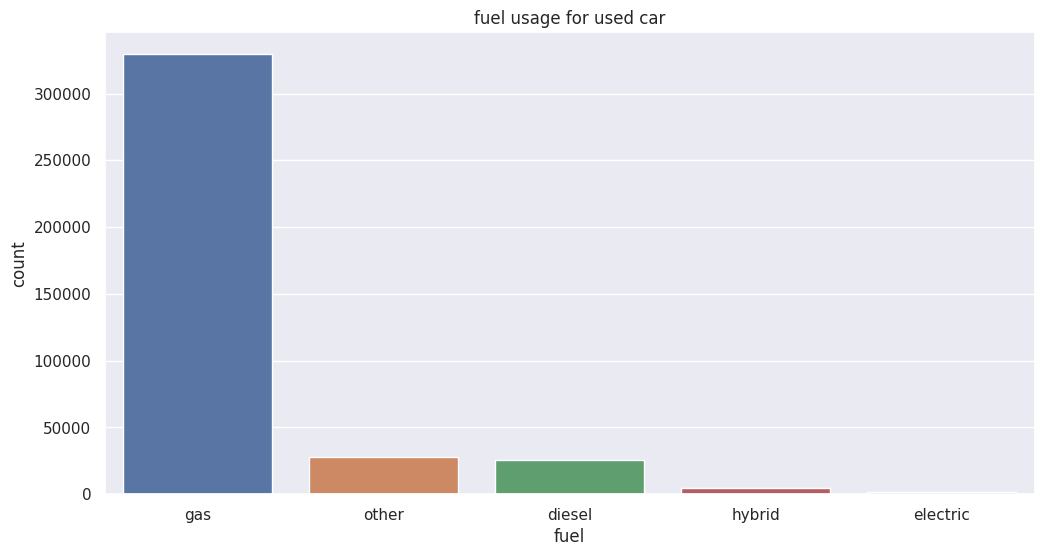

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x='fuel',y='count',data=fuel_count.query('fuel!="Not Provided"')).set(title='fuel usage for used car')
plt.show()

### 12. odometer

In [82]:
df['odometer'].describe()

count    3.900910e+05
mean     9.894297e+04
std      2.055280e+05
min      0.000000e+00
25%      3.842600e+04
50%      8.729100e+04
75%      1.356000e+05
max      1.000000e+07
Name: odometer, dtype: float64

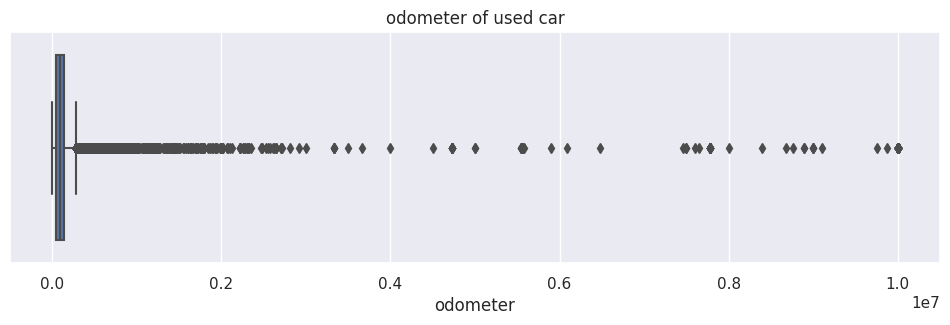

In [83]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df).set(title='odometer of used car')
plt.show()

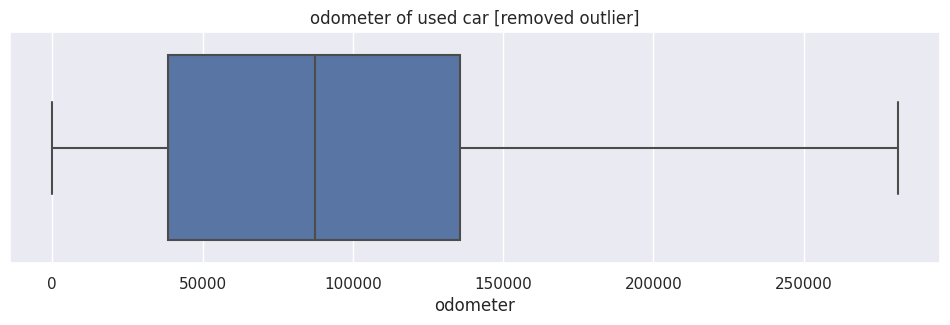

In [84]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df,showfliers=False).set(title='odometer of used car [removed outlier]')
plt.show()

In [85]:
odo_count=df['odometer'].value_counts().rename_axis('odometer').reset_index(name="count")
odo_count

odometer  count
0      100000.0   2107
1           1.0   1888
2      200000.0   1674
3      150000.0   1555
4      140000.0   1220
...         ...    ...
98561   83311.0      1
98562  169009.0      1
98563   50815.0      1
98564   89772.0      1
98565   26892.0      1

[98566 rows x 2 columns]

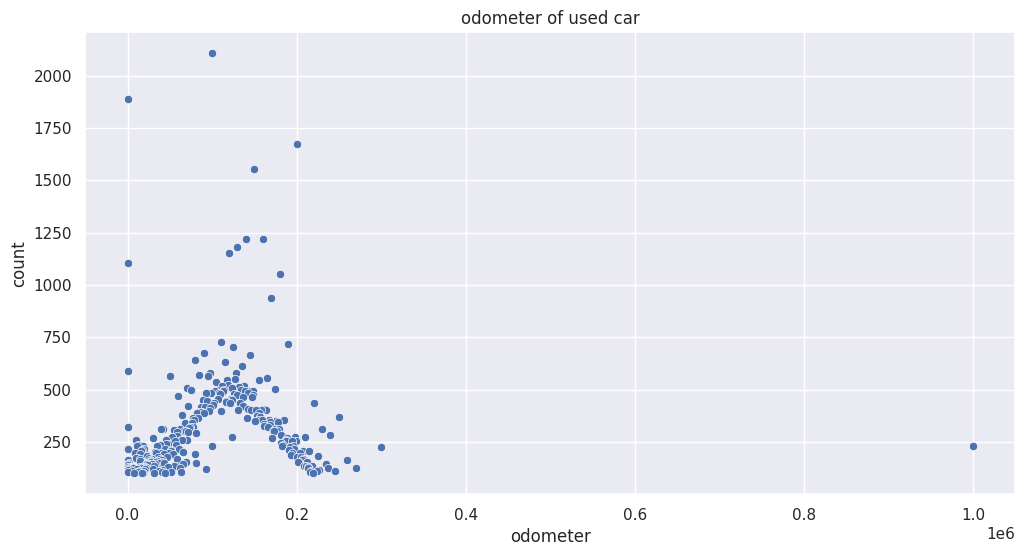

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer',y='count',data=odo_count.query('count >100')).set(title='odometer of used car')
plt.show()

Based on obeservation, scaling is required on odometer to show process of normalizing the range of features in a dataset.

### 13. title_status

clean         371321
rebuilt         7133
salvage         3825
lien            1410
missing          785
parts only       188
Name: title_status, dtype: int64


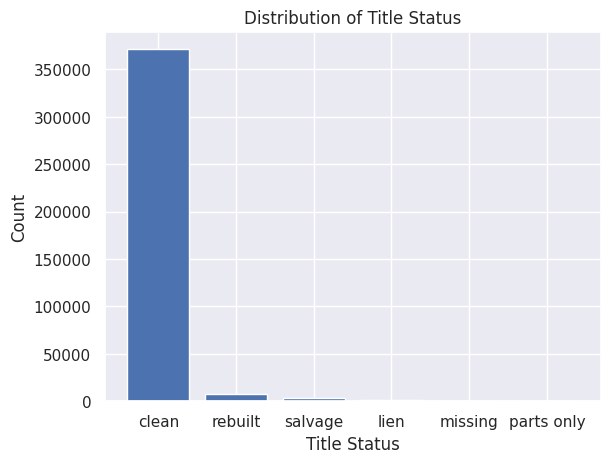

In [87]:
# Create a frequency table for the title_status variable
title_status_freq = df['title_status'].value_counts()
print(title_status_freq)

# Create a bar chart for the title_status variable
plt.bar(title_status_freq.index, title_status_freq.values)
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.title('Distribution of Title Status')
plt.show()

### 14. transmission

automatic    305466
other         61419
manual        23660
Name: transmission, dtype: int64


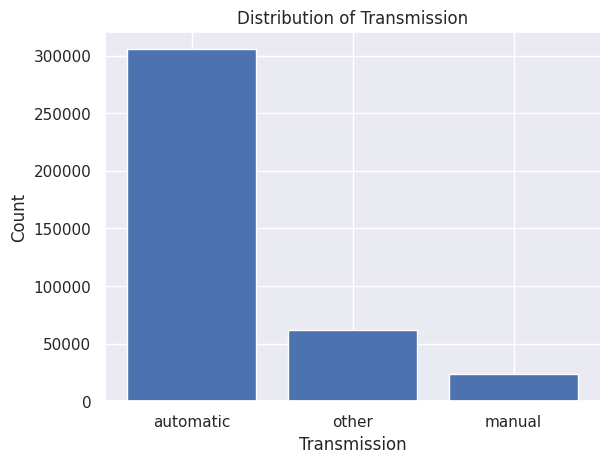

In [88]:
# Create a frequency table for the transmission variable
transmission_freq = df['transmission'].value_counts()
print(transmission_freq)

# Create a bar chart for the transmission variable
plt.bar(transmission_freq.index, transmission_freq.values)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Distribution of Transmission')
plt.show()

### 15. VIN [Dropped]

In [89]:
df['VIN'].describe()

count                240788
unique               105386
top       1FMJU1JT1HEA52352
freq                    261
Name: VIN, dtype: object

In [90]:
df.drop(['VIN'],inplace=True,axis=1)

### 16. drive

4wd    120023
fwd     97538
rwd     55009
Name: drive, dtype: int64


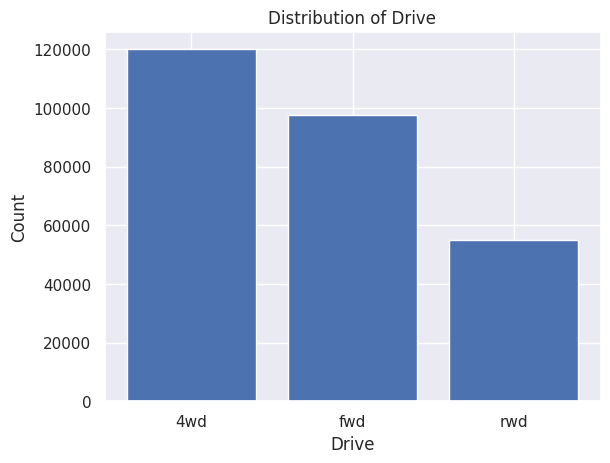

In [91]:
# Create a frequency table for the drive variable
drive_freq = df['drive'].value_counts()
print(drive_freq)

# Create a bar chart for the drive variable
plt.bar(drive_freq.index, drive_freq.values)
plt.xlabel('Drive')
plt.ylabel('Count')
plt.title('Distribution of Drive')
plt.show()

### 17. size

full-size      58301
mid-size       31863
compact        17590
sub-compact     2863
Name: size, dtype: int64


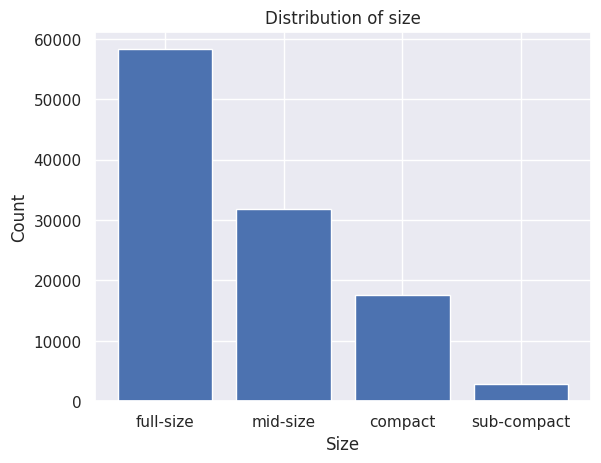

In [92]:
# Create a frequency table for the size variable
size_freq = df['size'].value_counts()
print(size_freq)

# Create a bar chart for the size variable
plt.bar(size_freq.index, size_freq.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of size')
plt.show()

### 18. type

sedan          80234
SUV            70459
pickup         41209
truck          30412
other          19709
coupe          17922
hatchback      15913
wagon          10050
van             7962
convertible     7312
mini-van        4552
offroad          591
bus              498
Name: type, dtype: int64


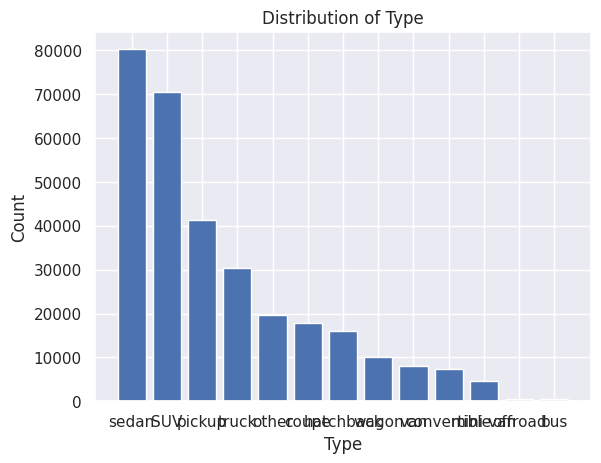

In [93]:
# Create a frequency table for the type variable
type_freq = df['type'].value_counts()
print(type_freq)

# Create a bar chart for the type variable
plt.bar(type_freq.index, type_freq.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Type')
plt.show()

### 19. paint_color

white     72589
black     58203
silver    40023
blue      29363
red       28738
grey      22754
green      7050
custom     6391
brown      6177
yellow     2014
orange     1843
purple      671
Name: paint_color, dtype: int64


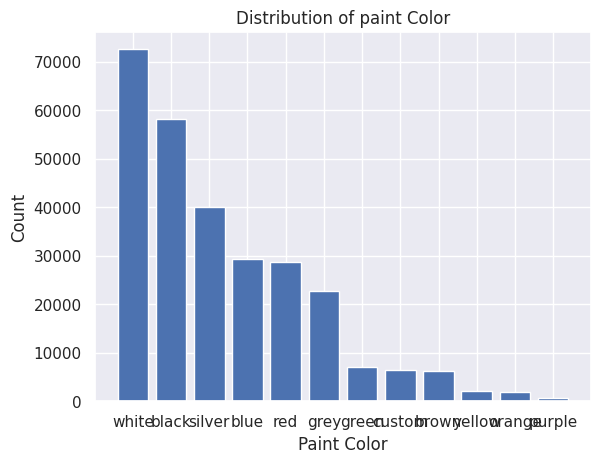

In [94]:
# Create a frequency table for the paint_color variable
paint_color_freq = df['paint_color'].value_counts()
print(paint_color_freq)

# Create a bar chart for the paint_color variable
plt.bar(paint_color_freq.index, paint_color_freq.values)
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.title('Distribution of paint Color')
plt.show()

### 20. image_url [Dropped]

In [95]:
df['image_url'].describe()

count                                                392297
unique                                               223919
top       https://images.craigslist.org/00N0N_1xMPvfxRAI...
freq                                                   7357
Name: image_url, dtype: object

In [96]:
df.drop(['image_url'],inplace=True,axis=1)

### 21. description [Dropped]

In [97]:
df['description'].describe()

count                                                392295
unique                                               332604
top       35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! T...
freq                                                    231
Name: description, dtype: object

In [98]:
df.drop(['description'],inplace=True,axis=1)

### 22. state

In [99]:
df['state'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'wa', 'wi', 'al',
       'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo', 'mt',
       'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc', 'sd',
       'tn', 'tx', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [100]:
df['state'].nunique()

51

In [101]:
df['state']=df['state'].str.upper()

### 23. 'lat', 'long'

In [102]:
df['lat'].isna().sum()

3482

In [103]:
df['long'].isna().sum()

3482

### 24. posting_date

In [104]:
df['posting_date'].describe()

count                        392359
unique                       309294
top       2021-05-04 12:31:18-05:00
freq                             26
Name: posting_date, dtype: object

## EDA Question

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392359 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            392359 non-null  object 
 1   region        392359 non-null  object 
 2   price         392359 non-null  int64  
 3   year          392359 non-null  float64
 4   manufacturer  376495 non-null  object 
 5   model         387845 non-null  object 
 6   condition     241991 non-null  object 
 7   cylinders     231549 non-null  float64
 8   fuel          389771 non-null  object 
 9   odometer      390091 non-null  float64
 10  title_status  384662 non-null  object 
 11  transmission  390545 non-null  object 
 12  drive         272570 non-null  object 
 13  size          110617 non-null  object 
 14  type          306823 non-null  object 
 15  paint_color   275816 non-null  object 
 16  state         392359 non-null  object 
 17  lat           388877 non-null  float64
 18  long

In [106]:
df.head(5)

id                  region  price    year manufacturer model  \
0  7222695916                prescott   6000  2014.0          NaN   NaN   
1  7218891961            fayetteville  11900  2014.0          NaN   NaN   
2  7221797935            florida keys  21000  2014.0          NaN   NaN   
3  7222270760  worcester / central MA   1500  2014.0          NaN   NaN   
4  7210384030              greensboro   4900  2014.0          NaN   NaN   

  condition  cylinders fuel  odometer title_status transmission drive size  \
0       NaN        NaN  NaN       NaN          NaN          NaN   NaN  NaN   
1       NaN        NaN  NaN       NaN          NaN          NaN   NaN  NaN   
2       NaN        NaN  NaN       NaN          NaN          NaN   NaN  NaN   
3       NaN        NaN  NaN       NaN          NaN          NaN   NaN  NaN   
4       NaN        NaN  NaN       NaN          NaN          NaN   NaN  NaN   

  type paint_color state  lat  long               posting_date  
0  NaN         NaN    AZ  NaN   NaN  2021-05-04 12:31:18-05:00  
1  NaN         NaN    AR  NaN   NaN  2021-05-04 12:31:18-05:00  
2  NaN         NaN    FL  NaN   NaN  2021-05-04 12:31:18-05:00  
3  NaN         NaN    MA  NaN   NaN  2021-05-04 12:31:18-05:00  
4  NaN         NaN    NC  NaN   NaN  2021-05-04 12:31:18-05:00

### Q1 : What is the price and fuel distribution between different year,cylinders and odometer?

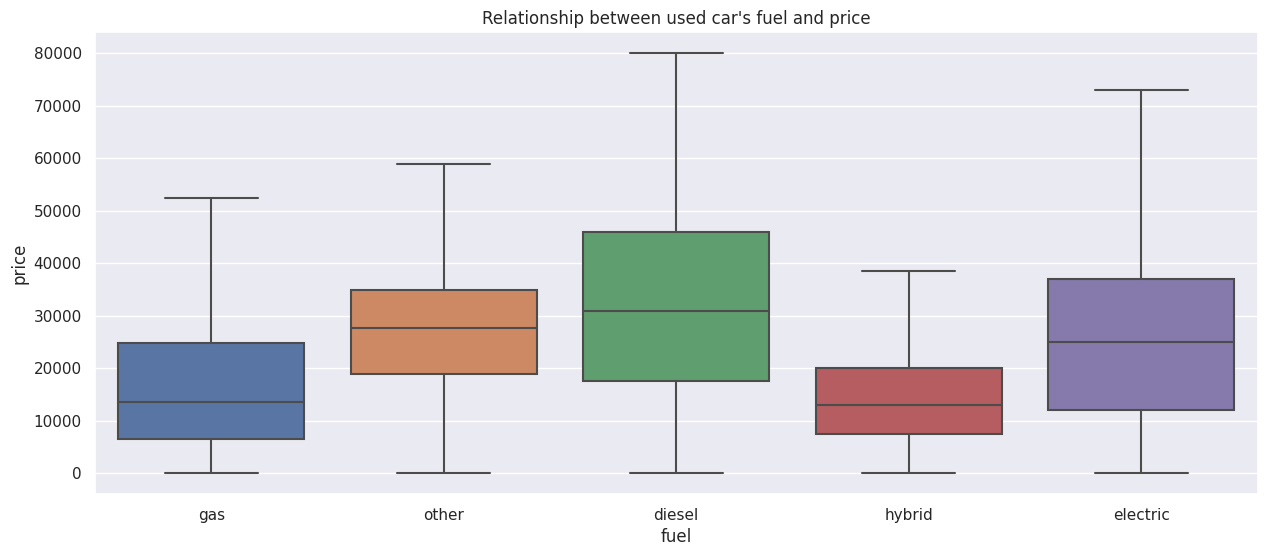

In [107]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel',y='price',data=df,showfliers=False).set(title="Relationship between used car's fuel and price")
plt.show()

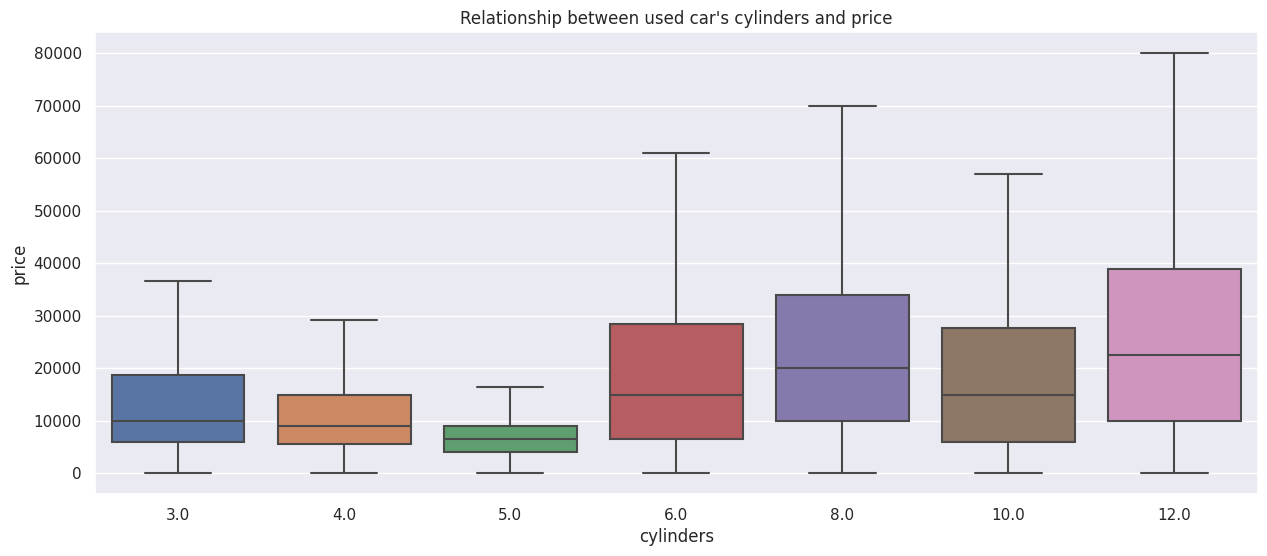

In [108]:
plt.figure(figsize=(15,6))
sns.boxplot(x='cylinders',y='price',data=df,showfliers=False).set(title="Relationship between used car's cylinders and price")
plt.show()

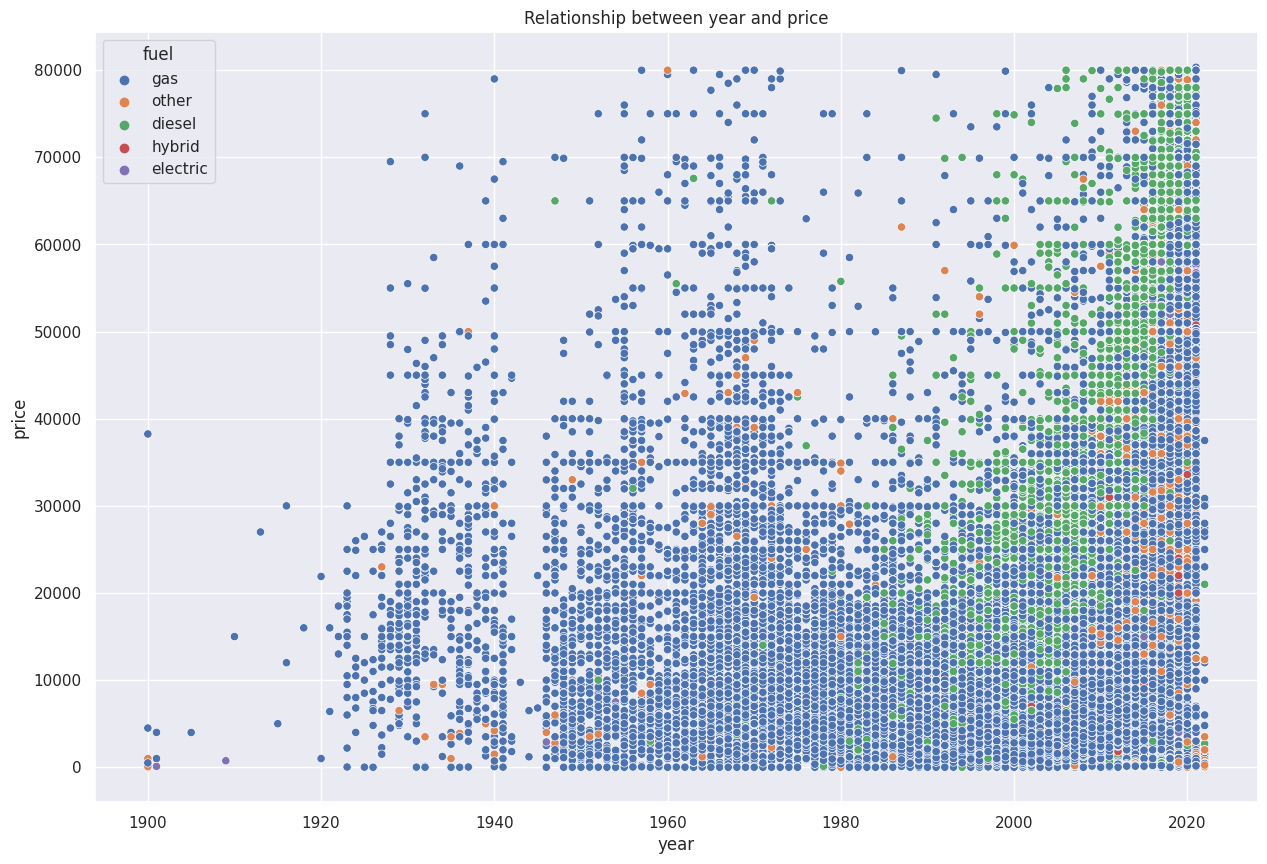

In [109]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year',y='price',hue='fuel',data=df).set(title='Relationship between year and price')
plt.show()

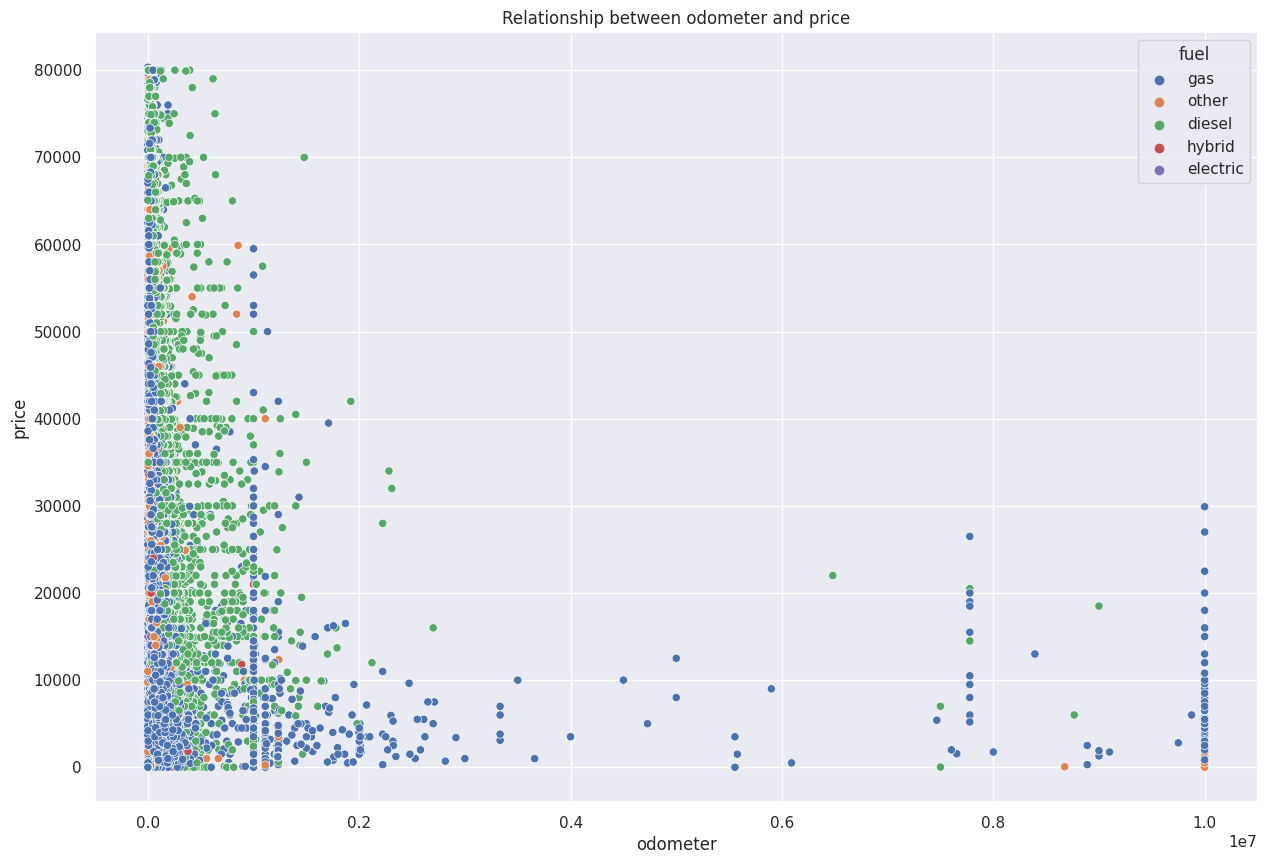

In [110]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='odometer',y='price',hue='fuel',data=df).set(title='Relationship between odometer and price')
plt.show()

### Q2 : What is the price, year and condition distribution?

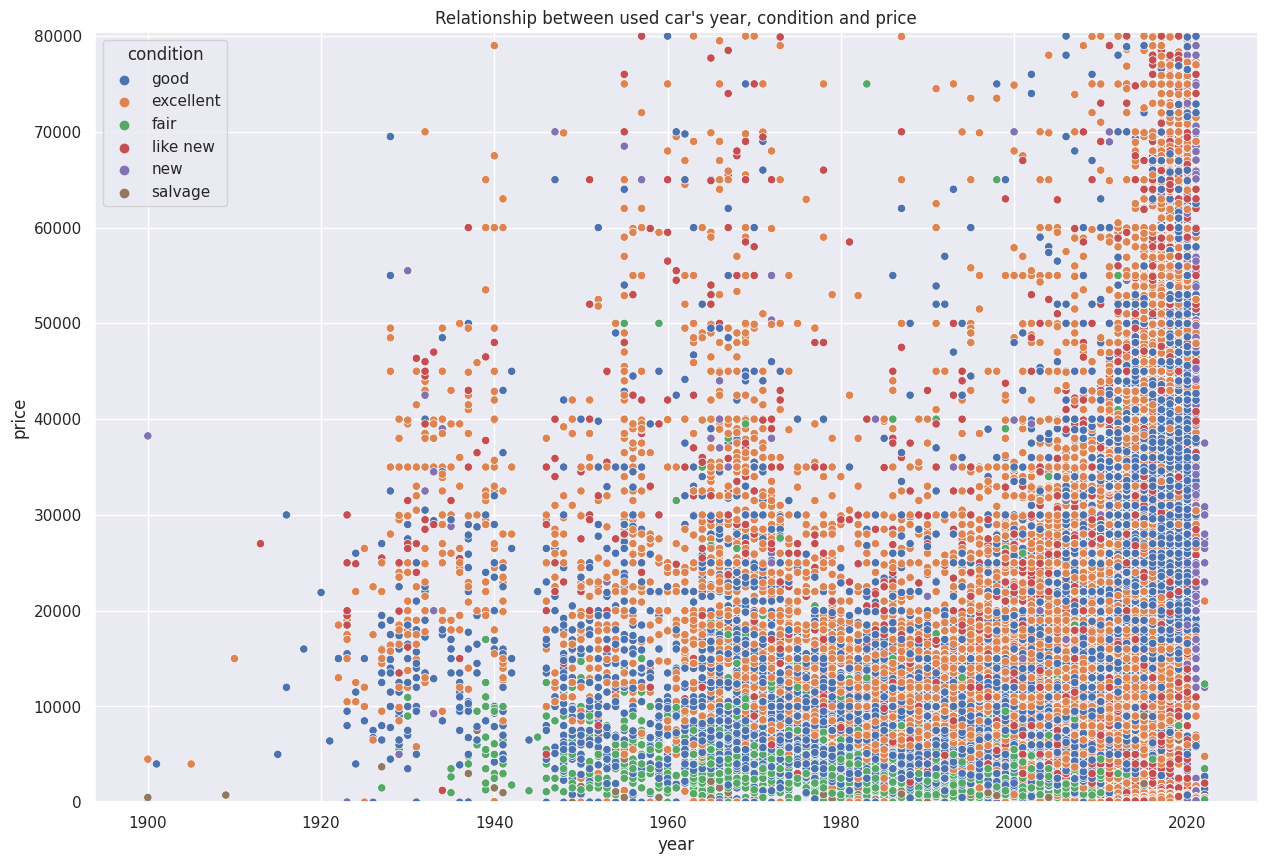

In [111]:
plt.figure(figsize=(15,10))
plt.ylim([0, ymax])
sns.scatterplot(x='year',y='price',hue='condition',data=df.query('condition!="Not Provided"')).set(title="Relationship between used car's year, condition and price")
plt.show()

### Q3 : Calculate descriptive statistics for the price variable.

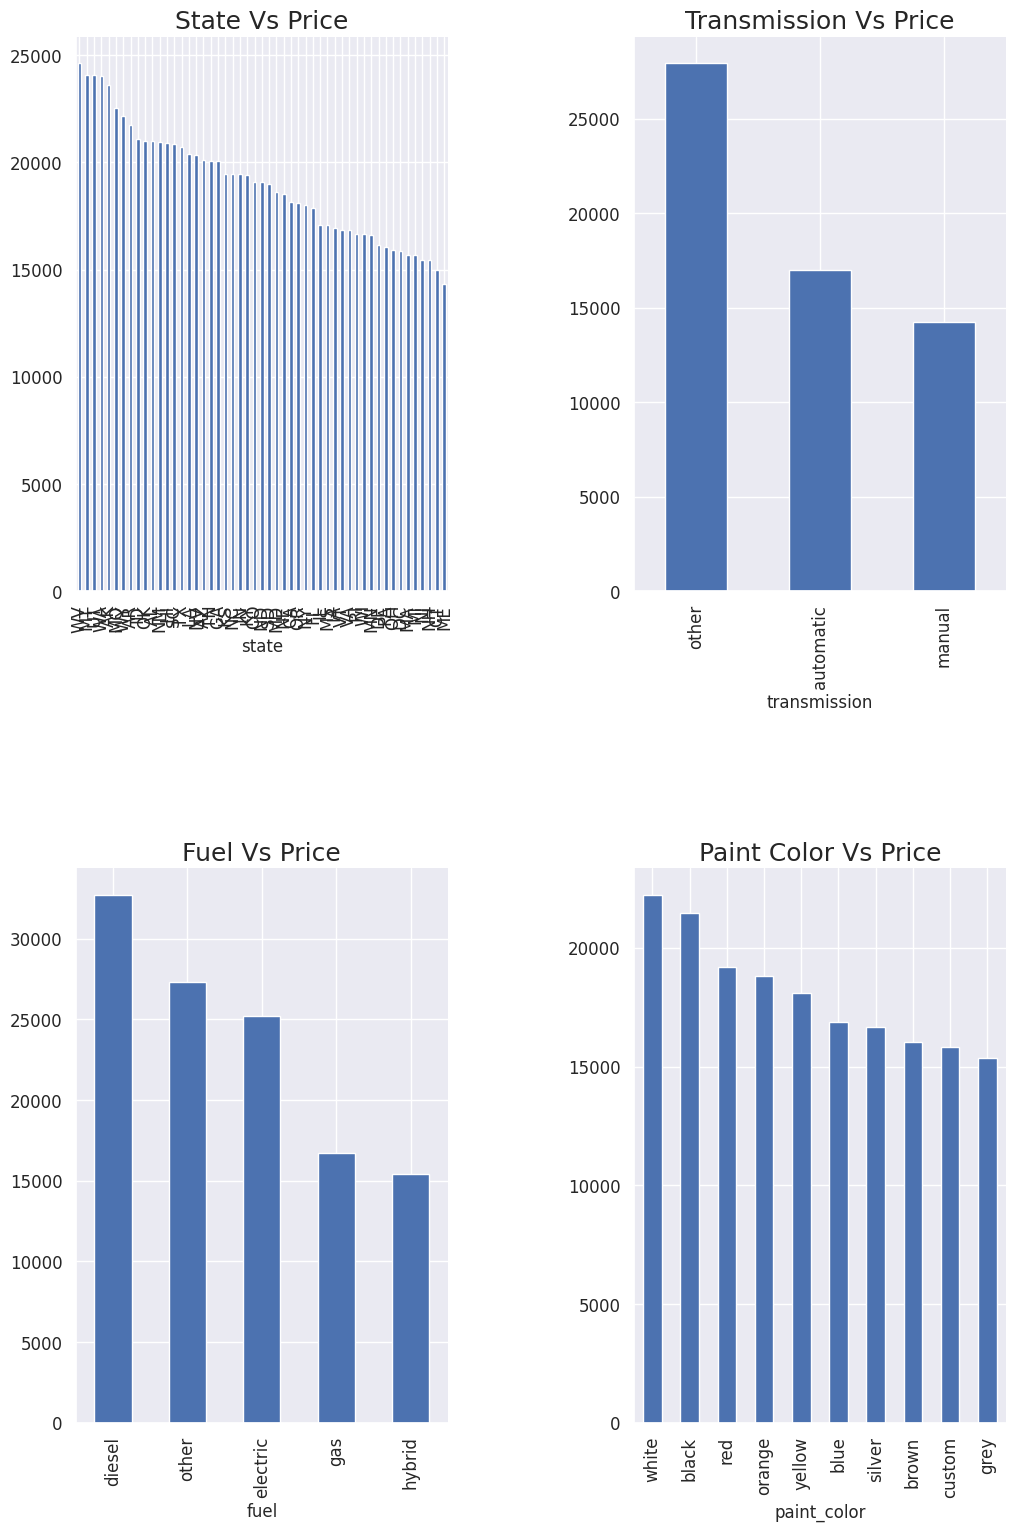

In [112]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, figsize=(12, 18))
df.groupby('state')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("State Vs Price", fontsize=18)
df.groupby('transmission')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('fuel')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel Vs Price", fontsize=18)
df.groupby('paint_color')['price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Paint Color Vs Price", fontsize=18)
plt.subplots_adjust(hspace=.5)
plt.subplots_adjust(wspace=.5)
sns.despine()

### Q4 : What is the distribution between transmission and price?

<Axes: xlabel='transmission', ylabel='price'>

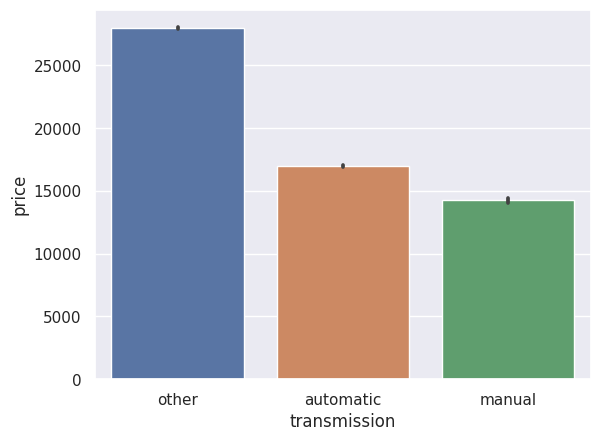

In [113]:
import seaborn as sns

# Use the sns.barplot() function to plot the bar chart
sns.barplot(x='transmission', y='price', data=df)

## First Correlation

<ipython-input-114-d0042528fd4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


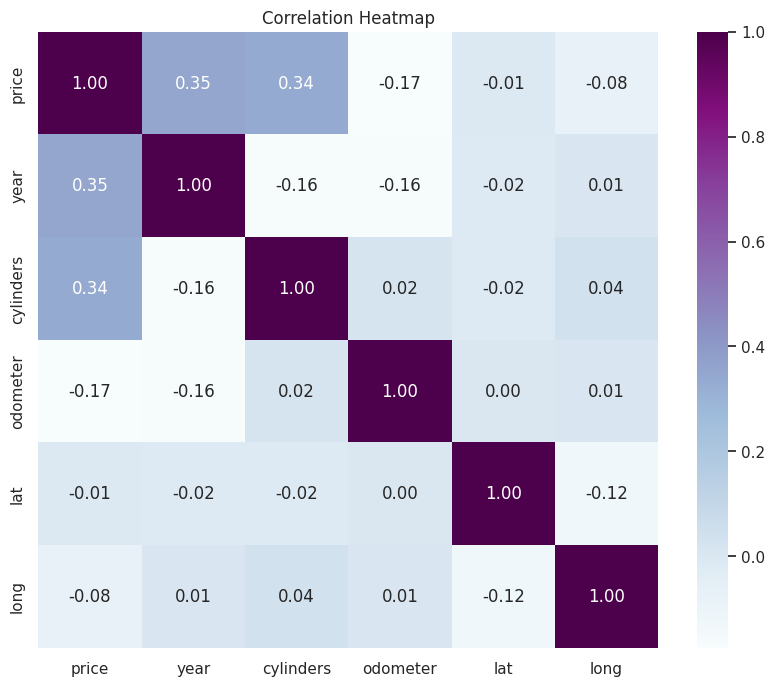

In [114]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [115]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from geopy.distance import great_circle

In [116]:
print(df.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


###Missing Value Handling

#### Handling missing value of odometer, transmission, and size

In [117]:
df['odometer'] = df.groupby('model')['odometer'].transform(lambda x: x.ffill().bfill())
df['transmission'] = df.groupby('model')['transmission'].transform(lambda x: x.ffill().bfill())
df['size'] = df.groupby('model')['size'].transform(lambda x: x.ffill().bfill())

In [118]:
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.ffill().bfill())

Impute columns_to_impute with 'most_freuent' strategy to replace missing value and avoid affecting data quality.

In [119]:
from sklearn.impute import SimpleImputer

# List of columns to impute
columns_to_impute = ['size','model', 'condition', 'transmission', 'manufacturer','fuel', 'title_status', 'drive', 'type', 'paint_color']

# Create a SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute the selected columns in the DataFrame
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

Impute 'odometer' column with 'mean' strategy to replace missing value and avoid affecting overall variable mean.

In [120]:
from sklearn.impute import SimpleImputer

# List of columns to impute with mean
columns_to_impute_with_mean = ['odometer']

# Create a SimpleImputer with the 'mean' strategy
imputer_mean = SimpleImputer(strategy='mean')

# Impute the selected columns in the DataFrame with mean values
df[columns_to_impute_with_mean] = imputer_mean.fit_transform(df[columns_to_impute_with_mean])

####Cylinders

Impute 'cylinders' column with 'mean' strategy to replace missing value and avoid affecting overall variable mean.

In [121]:
# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
df['cylinders'] = imputer.fit_transform(df[['cylinders']])
df['cylinders']

0         5.892237
1         5.892237
2         5.892237
3         5.892237
4         5.892237
            ...   
426875    6.000000
426876    5.892237
426877    5.892237
426878    6.000000
426879    5.892237
Name: cylinders, Length: 392359, dtype: float64

####Latitude and Longitude
The geographical information has donwload at https://developers.google.com/public-data/docs/canonical/states_csv

In [122]:
region_geo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assessment_EDA/states-long-lat.csv")

In [123]:
region_geo.head()

state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California

In [124]:
df.head(3)

id        region  price    year manufacturer  model condition  \
0  7222695916      prescott   6000  2014.0         ford  f-150      good   
1  7218891961  fayetteville  11900  2014.0         ford  f-150      good   
2  7221797935  florida keys  21000  2014.0         ford  f-150      good   

   cylinders fuel      odometer title_status transmission drive       size  \
0   5.892237  gas  98331.623661        clean    automatic   4wd  full-size   
1   5.892237  gas  98331.623661        clean    automatic   4wd  full-size   
2   5.892237  gas  98331.623661        clean    automatic   4wd  full-size   

    type paint_color state  lat  long               posting_date  
0  sedan       white    AZ  NaN   NaN  2021-05-04 12:31:18-05:00  
1  sedan       white    AR  NaN   NaN  2021-05-04 12:31:18-05:00  
2  sedan       white    FL  NaN   NaN  2021-05-04 12:31:18-05:00

Replace the latitude and longitude in df and combine them into new 'geo' column

In [125]:
import pandas as pd

# Merge df and region_geo on the 'state' column
df = pd.merge(df, region_geo[['state', 'latitude', 'longitude']], on='state', how='left')

# Function to fill missing lat and long values
def fill_missing_lat_long(row):
    if pd.isna(row['lat']) or pd.isna(row['long']):
        row['lat'], row['long'] = row['latitude'], row['longitude']
    return row

# Apply the function to fill missing values
df = df.apply(fill_missing_lat_long, axis=1)

# Combine latitude and longitude into a new 'geo' column
df['geo'] = df[['lat', 'long']].astype(str).agg(','.join, axis=1)

In [126]:
# Drop unnecessary columns
df.drop(['lat', 'long', 'latitude', 'longitude'], axis=1, inplace=True)

In [127]:
df.head(5)

id                  region  price    year manufacturer  model  \
0  7222695916                prescott   6000  2014.0         ford  f-150   
1  7218891961            fayetteville  11900  2014.0         ford  f-150   
2  7221797935            florida keys  21000  2014.0         ford  f-150   
3  7222270760  worcester / central MA   1500  2014.0         ford  f-150   
4  7210384030              greensboro   4900  2014.0         ford  f-150   

  condition  cylinders fuel      odometer title_status transmission drive  \
0      good   5.892237  gas  98331.623661        clean    automatic   4wd   
1      good   5.892237  gas  98331.623661        clean    automatic   4wd   
2      good   5.892237  gas  98331.623661        clean    automatic   4wd   
3      good   5.892237  gas  98331.623661        clean    automatic   4wd   
4      good   5.892237  gas  98331.623661        clean    automatic   4wd   

        size   type paint_color state               posting_date  \
0  full-size  sedan       white    AZ  2021-05-04 12:31:18-05:00   
1  full-size  sedan       white    AR  2021-05-04 12:31:18-05:00   
2  full-size  sedan       white    FL  2021-05-04 12:31:18-05:00   
3  full-size  sedan       white    MA  2021-05-04 12:31:18-05:00   
4  full-size  sedan       white    NC  2021-05-04 12:31:18-05:00   

                     geo  
0  34.048928,-111.093731  
1    35.20105,-91.831833  
2   27.664827,-81.515754  
3   42.407211,-71.382437  
4     35.759573,-79.0193

In [128]:
# Check missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
posting_date    0
geo             0
dtype: int64


### Combine Features

To combine 'year' column by using current year (Year 2023) minus 'year' value in df to discover the vehicle age.

In [129]:
# Calculate the age of the vehicle
current_year = pd.to_datetime('now').year
df['age_of_vehicle'] = current_year - df['year']
df['age_of_vehicle']

<ipython-input-129-9c7c4165a6d0>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


0         9.0
1         9.0
2         9.0
3         9.0
4         9.0
         ... 
392354    4.0
392355    3.0
392356    3.0
392357    5.0
392358    4.0
Name: age_of_vehicle, Length: 392359, dtype: float64

In [130]:
df['age_of_vehicle'].isna().sum()

0

###Scaling
- Odometer

In [131]:
# Log scaling for 'odometer'
df['odometer_log'] = df['odometer'].apply(lambda x: None if x == 0 else np.log(x))
df

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000  2014.0         ford   
1       7218891961            fayetteville  11900  2014.0         ford   
2       7221797935            florida keys  21000  2014.0         ford   
3       7222270760  worcester / central MA   1500  2014.0         ford   
4       7210384030              greensboro   4900  2014.0         ford   
...            ...                     ...    ...     ...          ...   
392354  7301591192                 wyoming  23590  2019.0       nissan   
392355  7301591187                 wyoming  30590  2020.0        volvo   
392356  7301591147                 wyoming  34990  2020.0     cadillac   
392357  7301591140                 wyoming  28990  2018.0        lexus   
392358  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition  cylinders    fuel      odometer  \
0                          f-150      good   5.892237     gas  98331.623661   
1                          f-150      good   5.892237     gas  98331.623661   
2                          f-150      good   5.892237     gas  98331.623661   
3                          f-150      good   5.892237     gas  98331.623661   
4                          f-150      good   5.892237     gas  98331.623661   
...                          ...       ...        ...     ...           ...   
392354         maxima s sedan 4d      good   6.000000     gas  32226.000000   
392355  s60 t5 momentum sedan 4d      good   5.892237     gas  12029.000000   
392356          xt4 sport suv 4d      good   5.892237  diesel   4174.000000   
392357           es 350 sedan 4d      good   6.000000     gas  30112.000000   
392358  4 series 430i gran coupe      good   5.892237     gas  22716.000000   

        ... transmission drive       size       type paint_color state  \
0       ...    automatic   4wd  full-size      sedan       white    AZ   
1       ...    automatic   4wd  full-size      sedan       white    AR   
2       ...    automatic   4wd  full-size      sedan       white    FL   
3       ...    automatic   4wd  full-size      sedan       white    MA   
4       ...    automatic   4wd  full-size      sedan       white    NC   
...     ...          ...   ...        ...        ...         ...   ...   
392354  ...        other   fwd  full-size      sedan       white    WY   
392355  ...        other   fwd  full-size      sedan         red    WY   
392356  ...        other   4wd  full-size  hatchback       white    WY   
392357  ...        other   fwd  full-size      sedan      silver    WY   
392358  ...        other   rwd  full-size      coupe       white    WY   

                     posting_date                    geo age_of_vehicle  \
0       2021-05-04 12:31:18-05:00  34.048928,-111.093731            9.0   
1       2021-05-04 12:31:18-05:00    35.20105,-91.831833            9.0   
2       2021-05-04 12:31:18-05:00   27.664827,-81.515754            9.0   
3       2021-05-04 12:31:18-05:00   42.407211,-71.382437            9.0   
4       2021-05-04 12:31:18-05:00     35.759573,-79.0193            9.0   
...                           ...                    ...            ...   
392354  2021-04-04 03:21:31-06:00       33.7865,-84.4454            4.0   
392355  2021-04-04 03:21:29-06:00       33.7865,-84.4454            3.0   
392356  2021-04-04 03:21:17-06:00   33.779214,-84.411811            3.0   
392357  2021-04-04 03:21:11-06:00       33.7865,-84.4454            5.0   
392358  2021-04-04 03:21:07-06:00   33.779214,-84.411811            4.0   

        odometer_log  
0          11.496101  
1          11.496101  
2          11.496101  
3          11.496101  
4          11.496101  
...              ...  
392354     10.380529  
392355      9.395076  
392356      8.336630  
392357     10.312679  
392358     10.030825  

[392359 rows x 21 columns]

###Categorical Features

####Word2Vec model
- model

####One-hot Encoding

- manufacturer

- condition
- cylinders
- fuel
- title_status
- tramission
- drive
- size
- type
- paint_color



Word2Vec model:

Word2Vec was used to generate embeddings for car model names. Each car model was represented as a vector in a continuous space, allowing for numerical representation of categorical data. This is especially useful in machine learning tasks where models require numeric input features. The resulting embeddings could capture semantic relationships between different car models based on the patterns observed in the training data.

In [132]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

# 'model' column contains strings
model_sentences = [str(model).split() for model in df['model'].values]

# Choose a smaller embedding size (e.g., 10 dimensions)
embedding_size = 10

# Train Word2Vec model
model_test = Word2Vec(sentences=model_sentences, vector_size=embedding_size, window=5, min_count=1, workers=4)

# Function to get embedding for a car model
def get_model_embedding(car_model):
    return model_test.wv[car_model] if car_model in model_test.wv else np.zeros(embedding_size)

# Get unique model values
unique_models = df['model'].unique()

# Create a dictionary to store embeddings
embedding_dict = {model: np.zeros(embedding_size) for model in unique_models}

# Populate the dictionary with embeddings
for model in unique_models:
    embedding_dict[model] = get_model_embedding(model)

# Create DataFrame from the dictionary
embedding_df = pd.DataFrame(embedding_dict).T.reset_index()
embedding_df.columns = ['model'] + [f'{model}_embedding_{i}' for i in range(embedding_size)]

# Merge DataFrame with the original DataFrame on 'model' column
df = pd.merge(df, embedding_df, on='model', how='left')

# Display the resulting DataFrame with embedding columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in id: [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
Unique values in region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'bellingham'
 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham' 'dothan'
 'florence / muscle shoals' 'gadsden-anniston' 'huntsville / decatur'
 'mobile' 'montgomery' 'tuscaloosa' 'anchorage / mat-su' 'fairbanks'
 'kenai peninsula' 'southeast alaska' 'flagstaff / sedona' 'mohave county'
 'phoenix' 'show low' 'sierra vista' 'tucson' 'yuma' 'fort smith'
 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' '

In [133]:
#One-hot encoding for 'manufacturer' column
df = pd.get_dummies(df, columns=['manufacturer'], prefix='manufacturer')

In [134]:
#One-hot encoding for 'condition' column
df = pd.get_dummies(df, columns=['condition'], prefix='condition')

In [135]:
#One-hot encoding for 'cylinders' column
df = pd.get_dummies(df, columns=['cylinders'], prefix='cylinders')

In [136]:
#One-hot encoding for 'fuel' column
df = pd.get_dummies(df, columns=['fuel'], prefix='fuel')

In [137]:
#One-hot encoding for 'title_status' column
df = pd.get_dummies(df, columns=['title_status'], prefix='car_status')

In [138]:
# One-hot encoding for 'transmission' column
df = pd.get_dummies(df, columns=['transmission'], prefix='transmission')

In [139]:
#One-hot encoding for 'drive' column
df = pd.get_dummies(df, columns=['drive'], prefix='drive')

In [140]:
#One-hot encoding for 'size' column
df = pd.get_dummies(df, columns=['size'], prefix='size')

In [141]:
#One-hot encoding for 'type' column
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [142]:
#One-hot encoding for 'paint_color' column
df = pd.get_dummies(df, columns=['paint_color'], prefix='car_color')

In [143]:
#One-hot encoding for 'state' column
df = pd.get_dummies(df, columns=['state'], prefix='state')

In [144]:
state_columns = [col for col in df.columns if 'state' in col]
print(state_columns)

['state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']


In [145]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print(numeric_columns)

['id', 'price', 'year', 'odometer', 'age_of_vehicle', 'odometer_log', 'Paige Glenbrook Touring_embedding_0', 'Paige Glenbrook Touring_embedding_1', 'Paige Glenbrook Touring_embedding_2', 'Paige Glenbrook Touring_embedding_3', 'Paige Glenbrook Touring_embedding_4', 'Paige Glenbrook Touring_embedding_5', 'Paige Glenbrook Touring_embedding_6', 'Paige Glenbrook Touring_embedding_7', 'Paige Glenbrook Touring_embedding_8', 'Paige Glenbrook Touring_embedding_9', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover'

In [146]:
# Calculate the total unique values for each column
unique_values_counts = df.nunique()

# Display the column with the highest total unique values
column_with_highest_unique_values = unique_values_counts.idxmax()
highest_unique_value_count = unique_values_counts.max()

print(f"Column with the Highest Total Unique Values: {column_with_highest_unique_values}")
print(f"Highest Total Unique Value Count: {highest_unique_value_count}")

# Display the top N columns with the highest total unique values (assuming top_N is the desired number)
top_N = 10  # Change this to the desired number
top_columns = unique_values_counts.nlargest(top_N)

print(f"Top {top_N} Columns with the Highest Total Unique Values:")
print(top_columns)

Column with the Highest Total Unique Values: id
Highest Total Unique Value Count: 392359
Top 10 Columns with the Highest Total Unique Values:
id                                     392359
posting_date                           309294
odometer                                98056
odometer_log                            98055
geo                                     58785
model                                   28009
price                                   15233
Paige Glenbrook Touring_embedding_0      3019
Paige Glenbrook Touring_embedding_1      3019
Paige Glenbrook Touring_embedding_2      3019
dtype: int64


### Final Correlation:



####The top 8 highest correlation pairs (Grouped by State):

1. state_MD & manufacturer_morgan (0.919717):
- There is a very strong positive correlation (0.92) between the state of Maryland (MD) and vehicles manufactured by Morgan. This suggests that there may be a higher prevalence of Morgan vehicles in Maryland compared to other states.

2. manufacturer_infiniti & transmission_other (0.860079):
- There is a strong positive correlation (0.86) between vehicles manufactured by Infiniti and those with a transmission type labeled as 'other.' This may indicate a specific trend or preference for Infiniti vehicles having a non-standard or 'other' transmission type.

3. state_WA & manufacturer_ferrari (0.859856):
- There is a strong positive correlation (0.86) between the state of Washington (WA) and vehicles manufactured by Ferrari. This suggests a potential concentration or popularity of Ferrari vehicles in Washington.

4. Paige Glenbrook Touring_embedding_7 & Paige Glenbrook Touring_embedding_6 (0.856476):
- There is a strong positive correlation (0.86) between two specific embeddings (features) related to the Paige Glenbrook Touring. This indicates a high degree of similarity or association between the values of these two embeddings.

5. odometer & odometer_log (0.845278):
- There is a strong positive correlation (0.85) between the actual odometer reading and the logarithmically transformed odometer values. This suggests a linear relationship between the two, indicating that as the actual odometer reading increases, the logarithmically transformed value also increases.

6. manufacturer_jaguar & transmission_other (0.836253):
- There is a strong positive correlation (0.84) between vehicles manufactured by Jaguar and those with a transmission type labeled as 'other.' Similar to the second pair, this may indicate a specific trend or preference for Jaguar vehicles having a non-standard or 'other' transmission type.

7. manufacturer_jeep & drive_4wd (0.811754):
- There is a strong positive correlation (0.81) between vehicles manufactured by Jeep and those with a 4-wheel drive drive type. This is expected, as Jeep vehicles are often associated with 4-wheel drive  capabilities.

8. Paige Glenbrook Touring_embedding_4 & cylinders_4.0 (0.806908):
- There is a strong positive correlation (0.81) between a specific embedding (feature) related to the Paige Glenbrook Touring and the presence of a 4.0-liter engine (cylinders). This suggests that certain characteristics or features of the Paige Glenbrook Touring (captured in the embedding) are correlated with having a 4.0-liter engine.

In [147]:
# 'state' is the column containing state information
states = ['state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']

# Group by 'state' and calculate mean for each numeric column
grouped_by_state = df.groupby(states)[['id', 'price', 'year', 'odometer', 'age_of_vehicle', 'odometer_log', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen', 'manufacturer_volvo', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'cylinders_3.0', 'cylinders_4.0', 'cylinders_5.0', 'cylinders_5.892237060819273', 'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0', 'cylinders_12.0', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'car_status_clean', 'car_status_lien', 'car_status_missing', 'car_status_parts only', 'car_status_rebuilt', 'car_status_salvage', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact', 'type_SUV', 'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon', 'car_color_black', 'car_color_blue', 'car_color_brown', 'car_color_custom', 'car_color_green', 'car_color_grey', 'car_color_orange', 'car_color_purple', 'car_color_red', 'car_color_silver', 'car_color_white', 'car_color_yellow', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'Paige Glenbrook Touring_embedding_0', 'Paige Glenbrook Touring_embedding_1', 'Paige Glenbrook Touring_embedding_2', 'Paige Glenbrook Touring_embedding_3', 'Paige Glenbrook Touring_embedding_4', 'Paige Glenbrook Touring_embedding_5', 'Paige Glenbrook Touring_embedding_6', 'Paige Glenbrook Touring_embedding_7', 'Paige Glenbrook Touring_embedding_8', 'Paige Glenbrook Touring_embedding_9']].mean()

# Display the grouped data
print(grouped_by_state)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      id  \
state_AK state_AL state_AR state_AZ state_CA state_CO state_CT state_DC state_DE state_FL state_GA state_HI state_IA state_ID state_IL state_IN state_KS state_KY state_LA state_MA state_MD state_ME state_MI state_MN state_MO state_MS state_MT state_NC state_ND state_NE state_NH state_NJ state_NM state_NV state_NY state_OH state_OK state_OR state_PA state_RI state_SC state_SD state_TN state_TX state_UT state_VA state_VT state_WA state_WI state_WV state_WY                 
0        0        0        0        0        0  

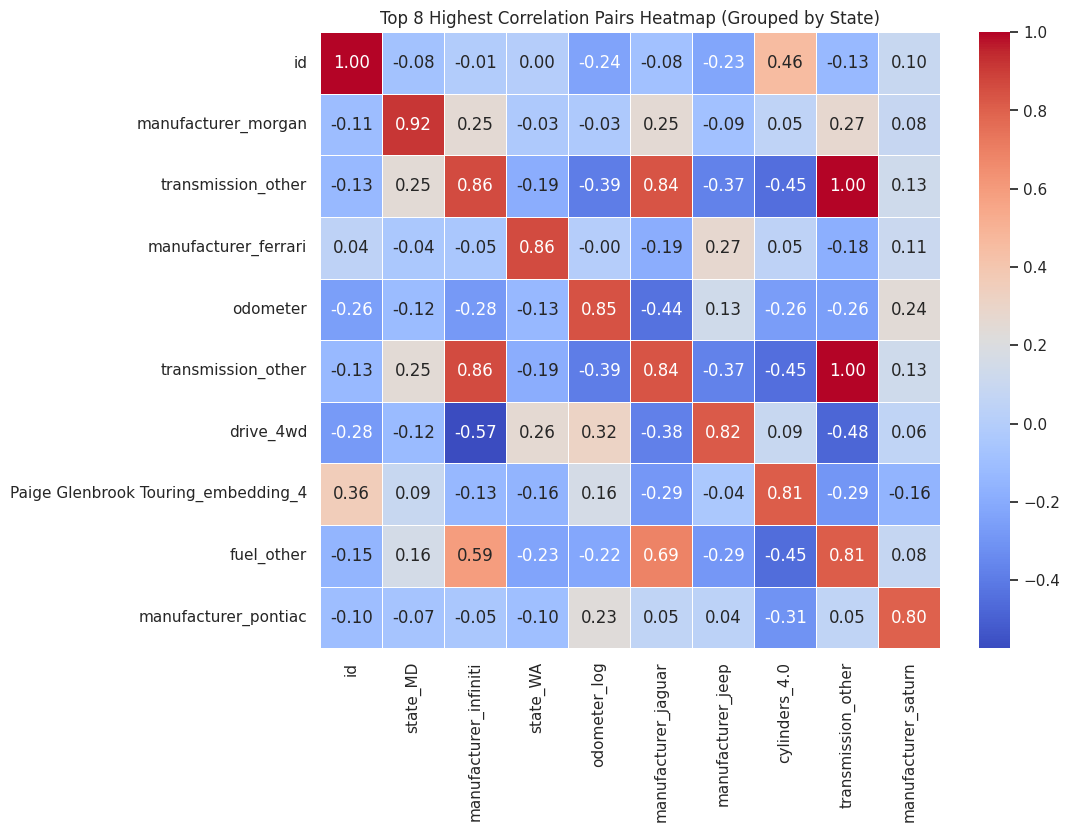

In [148]:
# Calculate correlation matrix for grouped data
correlation_matrix_grouped = grouped_by_state.corr()

# Find top 10 highest correlations
top_corr_pairs = (correlation_matrix_grouped
                  .stack()
                  .sort_values(ascending=False)
                  .drop_duplicates()
                  .head(10))

# Extract the top 8 correlation pairs
top_corr_matrix = correlation_matrix_grouped.loc[top_corr_pairs.index.get_level_values(0),
                                                 top_corr_pairs.index.get_level_values(1)]

# Create a heatmap for the top 10 highest correlations
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Top 8 Highest Correlation Pairs Heatmap (Grouped by State)")
plt.show()

In [149]:
top_corr_matrix

id  state_MD  \
id                                   1.000000 -0.079146   
manufacturer_morgan                 -0.109039  0.919717   
transmission_other                  -0.127109  0.249901   
manufacturer_ferrari                 0.044307 -0.044925   
odometer                            -0.257951 -0.115161   
transmission_other                  -0.127109  0.249901   
drive_4wd                           -0.278197 -0.119159   
Paige Glenbrook Touring_embedding_4  0.357143  0.093300   
fuel_other                          -0.153791  0.155087   
manufacturer_pontiac                -0.101838 -0.069537   

                                     manufacturer_infiniti  state_WA  \
id                                               -0.009240  0.003004   
manufacturer_morgan                               0.251382 -0.029745   
transmission_other                                0.860079 -0.190879   
manufacturer_ferrari                             -0.045946  0.859856   
odometer                                         -0.283675 -0.134488   
transmission_other                                0.860079 -0.190879   
drive_4wd                                        -0.573682  0.258372   
Paige Glenbrook Touring_embedding_4              -0.134929 -0.159679   
fuel_other                                        0.589248 -0.233269   
manufacturer_pontiac                             -0.047338 -0.097403   

                                     odometer_log  manufacturer_jaguar  \
id                                      -0.236000            -0.082549   
manufacturer_morgan                     -0.030846             0.252984   
transmission_other                      -0.389841             0.836253   
manufacturer_ferrari                    -0.000133            -0.189652   
odometer                                 0.845278            -0.437714   
transmission_other                      -0.389841             0.836253   
drive_4wd                                0.316548            -0.380969   
Paige Glenbrook Touring_embedding_4      0.161385            -0.287956   
fuel_other                              -0.221601             0.686519   
manufacturer_pontiac                     0.230586             0.054362   

                                     manufacturer_jeep  cylinders_4.0  \
id                                           -0.226376       0.457212   
manufacturer_morgan                          -0.088022       0.052595   
transmission_other                           -0.371915      -0.447985   
manufacturer_ferrari                          0.268683       0.045907   
odometer                                      0.133402      -0.261622   
transmission_other                           -0.371915      -0.447985   
drive_4wd                                     0.816827       0.092672   
Paige Glenbrook Touring_embedding_4          -0.041274       0.813728   
fuel_other                                   -0.288662      -0.451184   
manufacturer_pontiac                          0.035630      -0.308283   

                                     transmission_other  manufacturer_saturn  
id                                            -0.127109             0.095520  
manufacturer_morgan                            0.272947             0.084488  
transmission_other                             1.000000             0.131117  
manufacturer_ferrari                          -0.180685             0.105448  
odometer                                      -0.257561             0.242323  
transmission_other                             1.000000             0.131117  
drive_4wd                                     -0.477859             0.058774  
Paige Glenbrook Touring_embedding_4           -0.294164            -0.158100  
fuel_other                                     0.811754             0.080491  
manufacturer_pontiac                           0.054975             0.799855

####The top 10 highest correlation pairs:


1. manufacturer_morgan and state_MD: 0.9197
- There is a strong positive correlation (0.9197) between the manufacturer being "morgan" and the state being "MD" (Maryland). This suggests that a significant number of cars from the manufacturer "morgan" are registered in Maryland.

2. manufacturer_infiniti and transmission_other: 0.8601
- There is a strong positive correlation (0.8601) between cars from the manufacturer "infiniti" and having a transmission type labeled as "other." This indicates that a considerable proportion of Infiniti cars in the dataset have a non-standard transmission type.

3. manufacturer_ferrari and state_WA: 0.8599
- There is a strong positive correlation (0.8599) between cars from the manufacturer "ferrari" and being registered in Washington state (state code "WA"). This suggests that a notable number of Ferrari cars in the dataset are registered in Washington.

4. Paige Glenbrook Touring_embedding_6 and Paige Glenbrook Touring_embedding_7: 0.8565
- There is a strong positive correlation (0.8565) between two embedding dimensions (6 and 7) of cars with the model name "Paige Glenbrook Touring." This indicates a strong linear relationship between these two specific embedding dimensions for this particular car model.

5. odometer and odometer_log: 0.8453
- There is a strong positive correlation (0.8453) between the odometer reading and the logarithm of the odometer reading. This is expected, as the logarithm transformation is commonly used to deal with the skewed distribution of odometer values.

6. manufacturer_jaguar and transmission_other: 0.8363
- There is a strong positive correlation (0.8363) between cars from the manufacturer "jaguar" and having a transmission type labeled as "other."

7. drive_4wd and manufacturer_jeep: 0.8168
- There is a strong positive correlation (0.8168) between cars with four-wheel drive ("drive_4wd") and cars from the manufacturer "jeep." This suggests that a significant proportion of Jeep cars in the dataset have a four-wheel-drive configuration.

8. Paige Glenbrook Touring_embedding_4 and cylinders_4.0: 0.8069
- There is a strong positive correlation (0.8069) between the fourth dimension of the embedding for the car model "Paige Glenbrook Touring" and cars with 4.0 cylinders.

9. Paige Glenbrook Touring_embedding_3 and Paige Glenbrook Touring_embedding_2: 0.7997
There is a strong positive correlation (0.7997) between the third and second dimensions of the embedding for the car model "Paige Glenbrook Touring." This indicates a strong linear relationship between these two specific embedding dimensions for this particular car model.

10. manufacturer_pontiac and manufacturer_saturn: 0.7999
- There is a strong positive correlation (0.7999) between cars from the manufacturer "pontiac" and cars from the manufacturer "saturn." This suggests a notable association between these two manufacturers in the dataset.

In [150]:
# Find the highest correlation variables
highest_correlation_pairs = []

for col in correlation_matrix_grouped.columns:
    # Exclude diagonal elements (self-correlation)
    correlated_vars = correlation_matrix_grouped[col][correlation_matrix_grouped[col] != 1]

    # Find the variable with the highest absolute correlation
    if not correlated_vars.empty:
        max_corr_var = correlated_vars.idxmax()
        max_corr_value = correlation_matrix_grouped.loc[max_corr_var, col]
        highest_correlation_pairs.append((col, max_corr_var, max_corr_value))

# Display the highest correlation pairs
print("Highest Correlation Pairs:")
for pair in highest_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.4f}")

Highest Correlation Pairs:
id and size_compact: 0.6431
price and manufacturer_ram: 0.6837
year and price: 0.4557
odometer and odometer_log: 0.8453
age_of_vehicle and odometer: 0.6702
odometer_log and odometer: 0.8453
manufacturer_acura and manufacturer_infiniti: 0.7316
manufacturer_alfa-romeo and transmission_other: 0.6681
manufacturer_aston-martin and state_LA: 0.5745
manufacturer_audi and Paige Glenbrook Touring_embedding_0: 0.7219
manufacturer_bmw and manufacturer_mercedes-benz: 0.6785
manufacturer_buick and Paige Glenbrook Touring_embedding_1: 0.7137
manufacturer_cadillac and manufacturer_lincoln: 0.5814
manufacturer_chevrolet and Paige Glenbrook Touring_embedding_6: 0.7769
manufacturer_chrysler and Paige Glenbrook Touring_embedding_1: 0.6319
manufacturer_datsun and state_NE: 0.7734
manufacturer_dodge and Paige Glenbrook Touring_embedding_6: 0.5744
manufacturer_ferrari and state_WA: 0.8599
manufacturer_fiat and state_AZ: 0.5306
manufacturer_ford and cylinders_8.0: 0.6937
manufactur

<ipython-input-151-f8161a935643>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_10_correlation_matrix = correlation_matrix_grouped.loc[top_10_variables, top_10_variables]


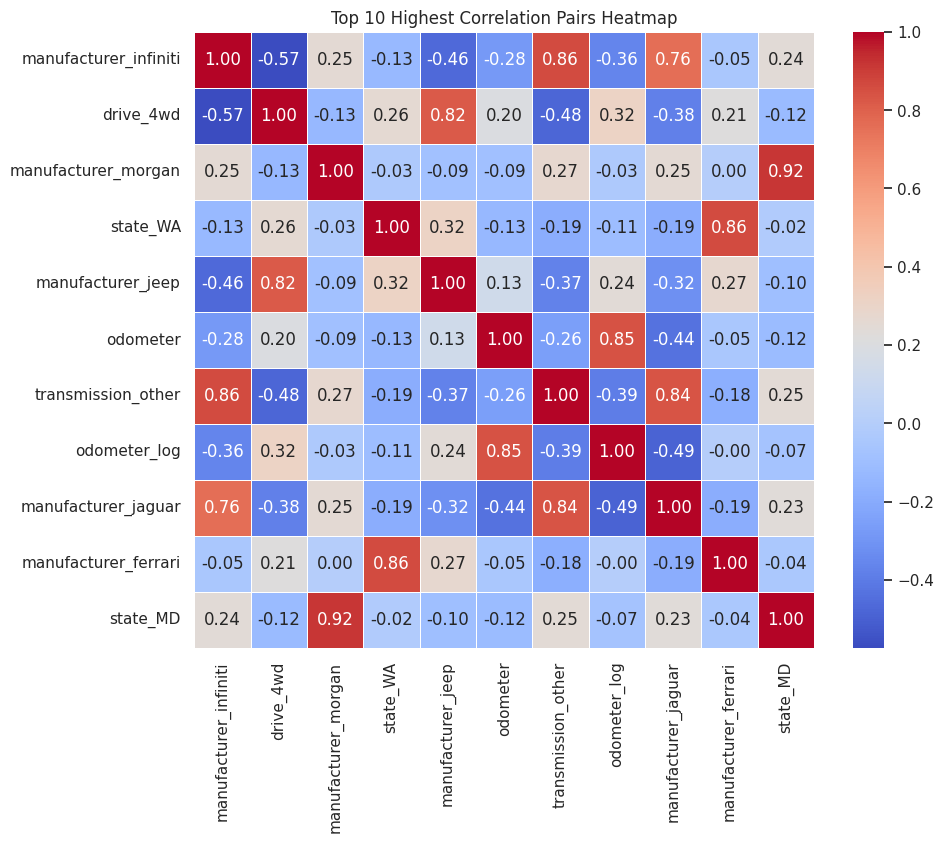

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 10 highest correlation pairs
top_10_highest_correlation_pairs = sorted(highest_correlation_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]

# Extract variable names from the top 10 pairs
top_10_variables = set(var for pair in top_10_highest_correlation_pairs for var in pair[:2])

# Create a DataFrame for the top 10 highest correlation pairs
top_10_correlation_matrix = correlation_matrix_grouped.loc[top_10_variables, top_10_variables]

# Set the style of the visualization
sns.set(style="white")

# Create a heatmap for the top 10 highest correlation pairs
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Top 10 Highest Correlation Pairs Heatmap")
plt.show()


## Conclusion

Feature engineering refers to the process of creating new features or modifying existing ones to improve the performance of a machine learning model. In the context of your previous conversation, feature engineering techniques were used to address specific challenges and enhance the dataset for better model training and interpretation. Here are some feature engineering techniques that were applied and the problems aimed to solve:

<u>**Datetime Transformation:**</u>

Problem:\
The "posting_date" column was originally in datetime format, but it had timezone issues.

Solution:\
The pd.to_datetime function was used with the utc=True parameter to ensure that datetime values are treated consistently, addressing the timezone-related error.

<u>**Handling Missing Values:**</u>

Problem: There were missing values in certain columns, such as "odometer" and "lat"/"long."

Solution:\
Techniques like mean

<u>**Correlation Improvement:**</u>

Positive correlation values close to 1 indicate a strong linear relationship between the variables, either positively or negatively correlated, depending on the sign. These correlation values provide insights into the relationships and associations within the dataset.

In summary, these correlations highlight specific relationships between variables after completed feature engineering. For example, certain vehicle manufacturers show strong associations with particular states, and certain vehicle features or characteristics (e.g., transmission type, engine size) exhibit strong correlations with each other.

The correlations provide insights into the relationships and associations between different variables in the dataset. These associations can be valuable for understanding patterns, identifying potential dependencies, and gaining insights into the characteristics of the cars and their registration.